In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import missingno as msno

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('zomato_restaurants_in_India.csv')
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [5]:
#Before Cleaning

<Axes: >

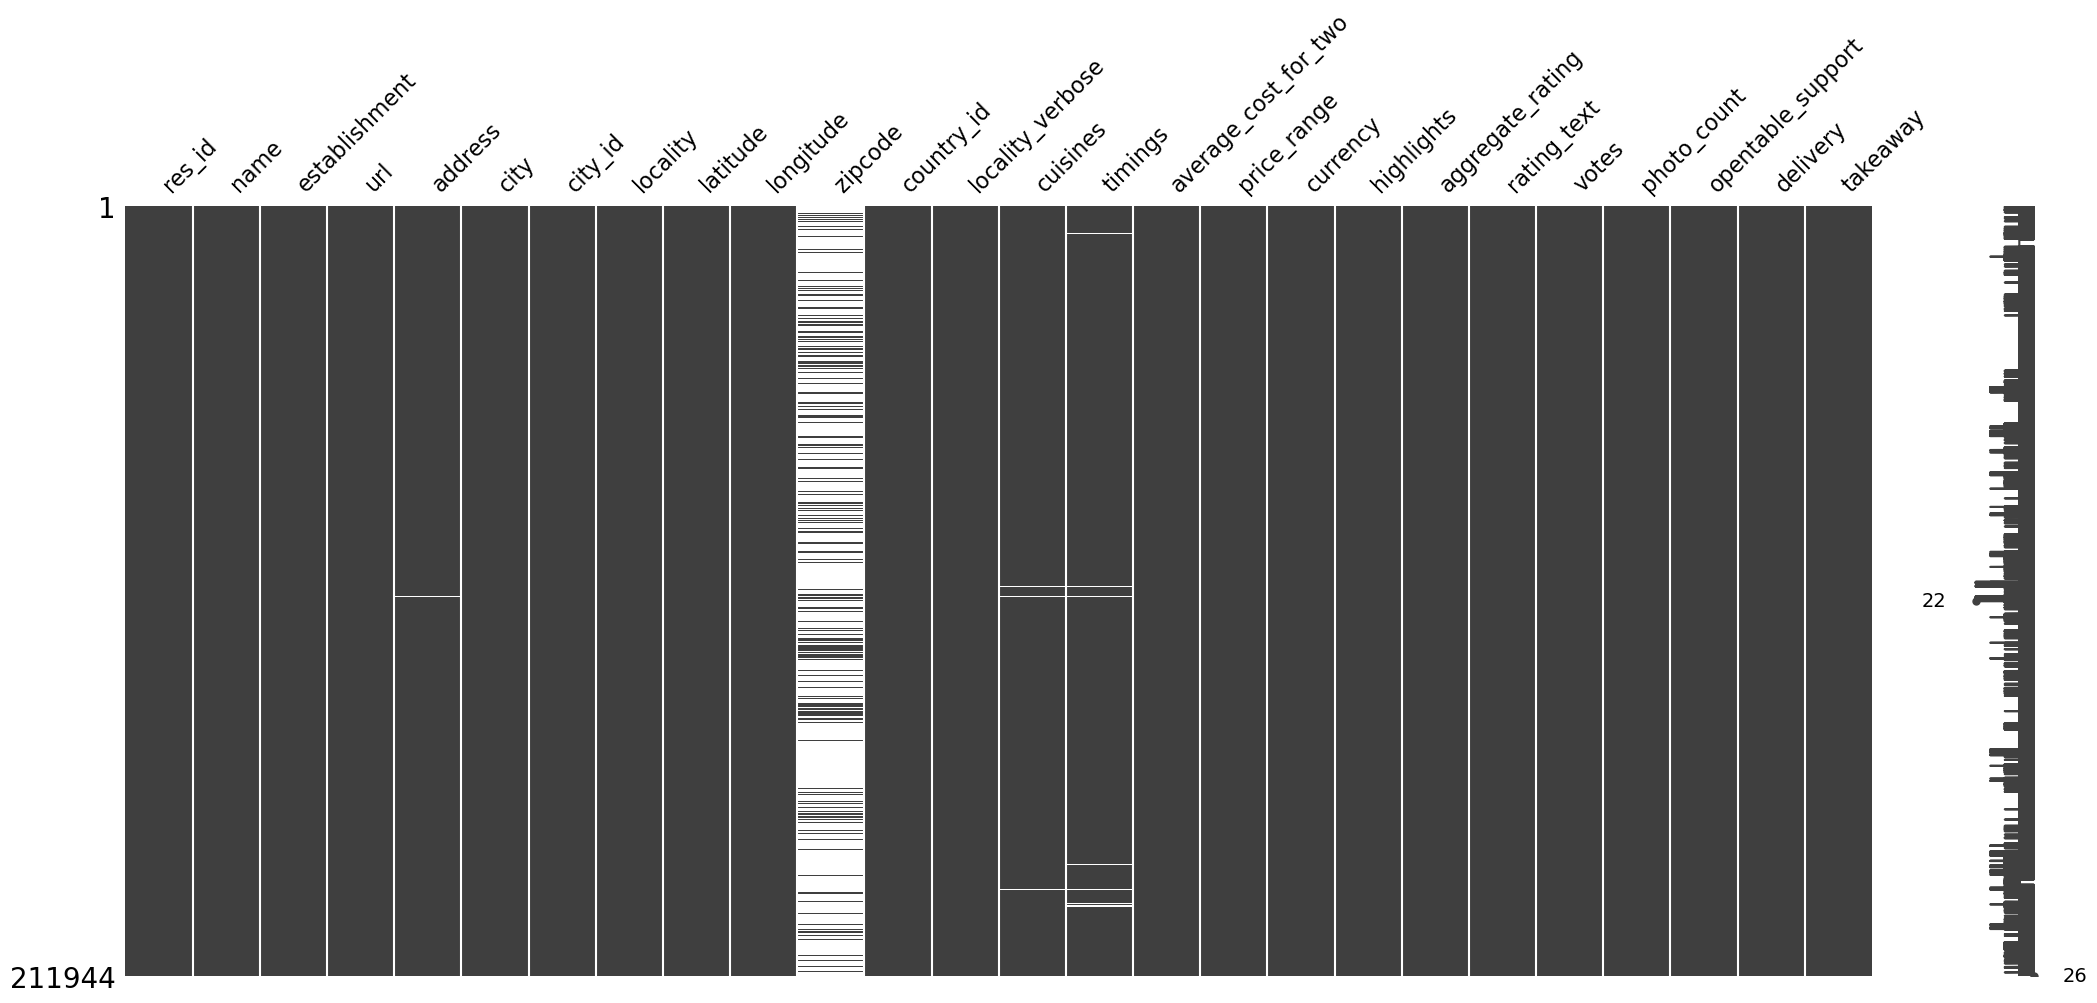

In [6]:
msno.matrix(df)

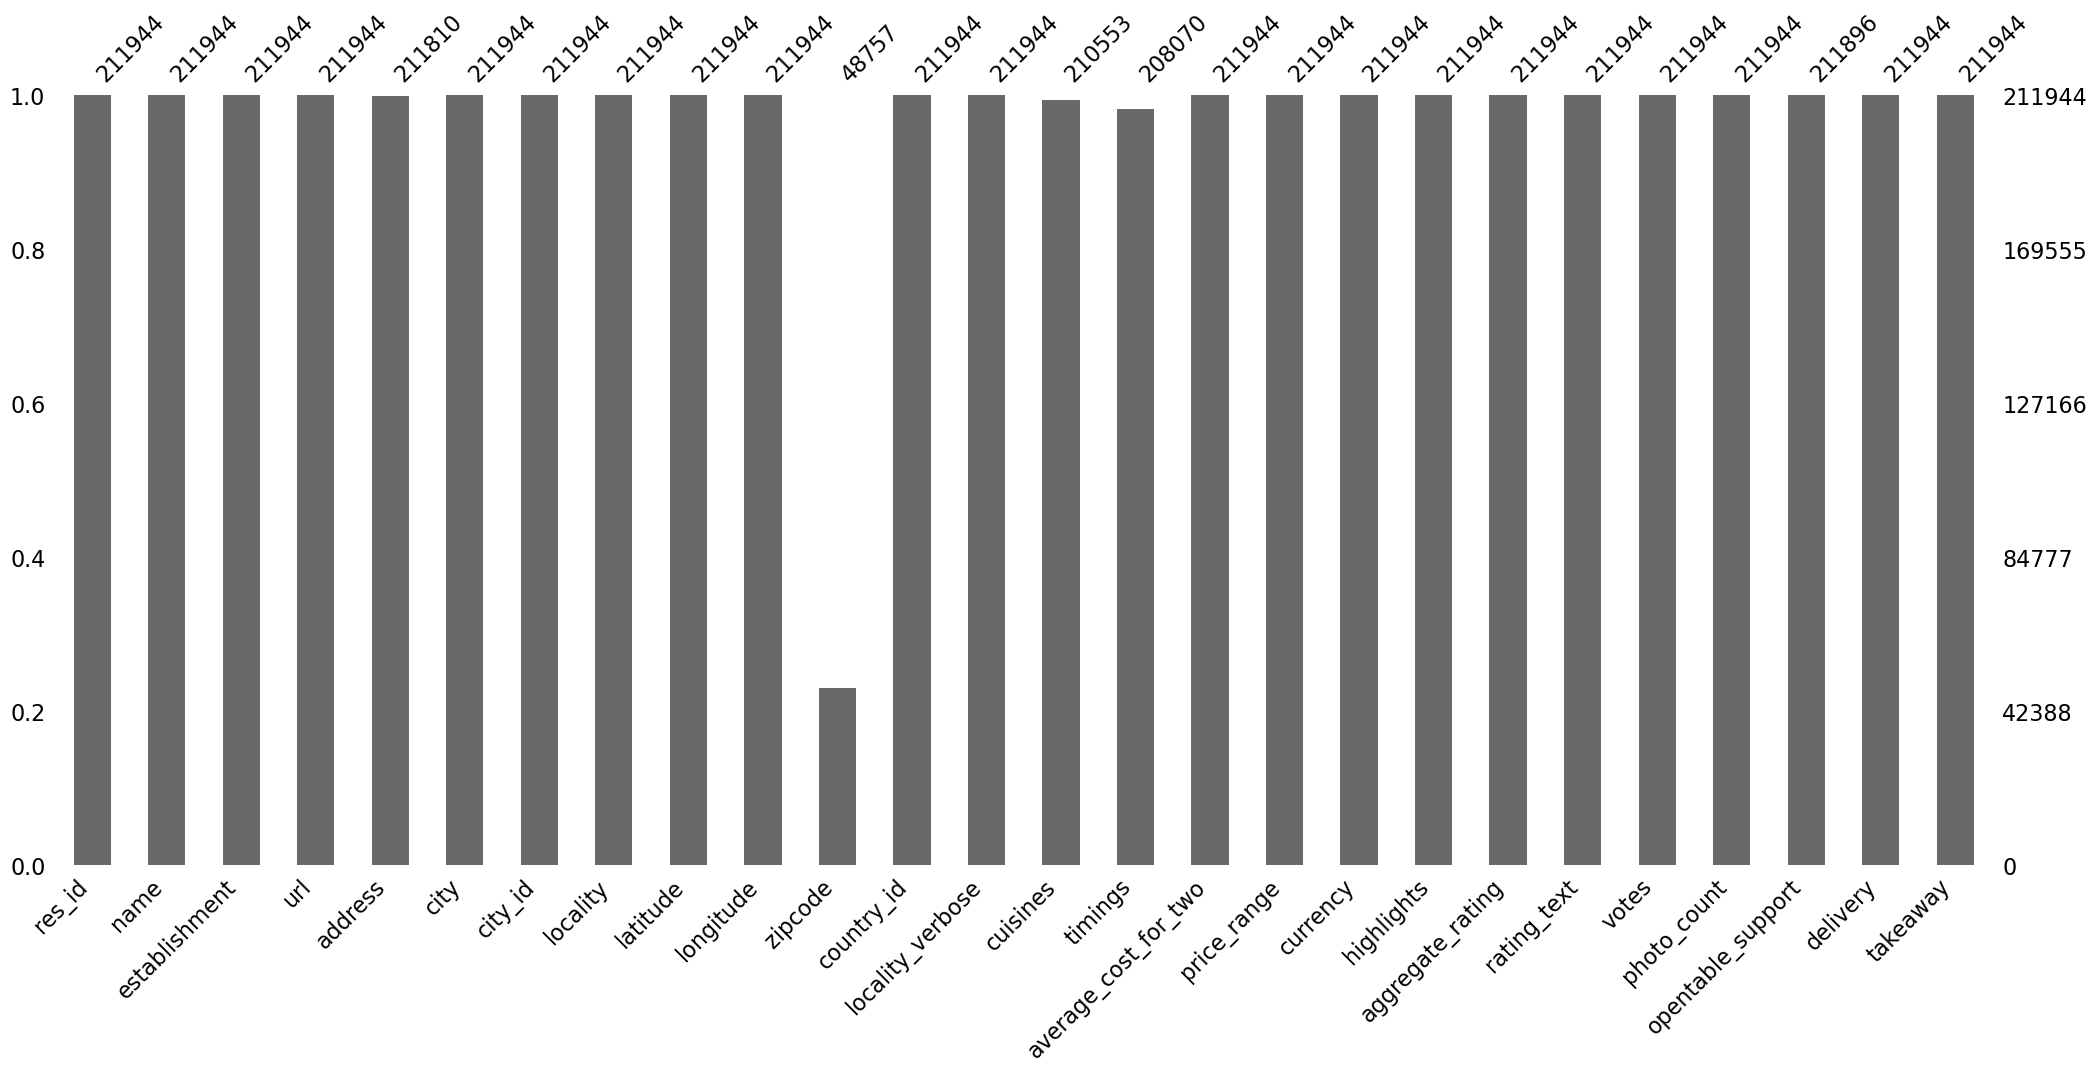

In [7]:
bar=msno.bar(df)
#here we can see more than 50% of the values in zip code is absent. Timings, cusines, opentable support has missing values. 

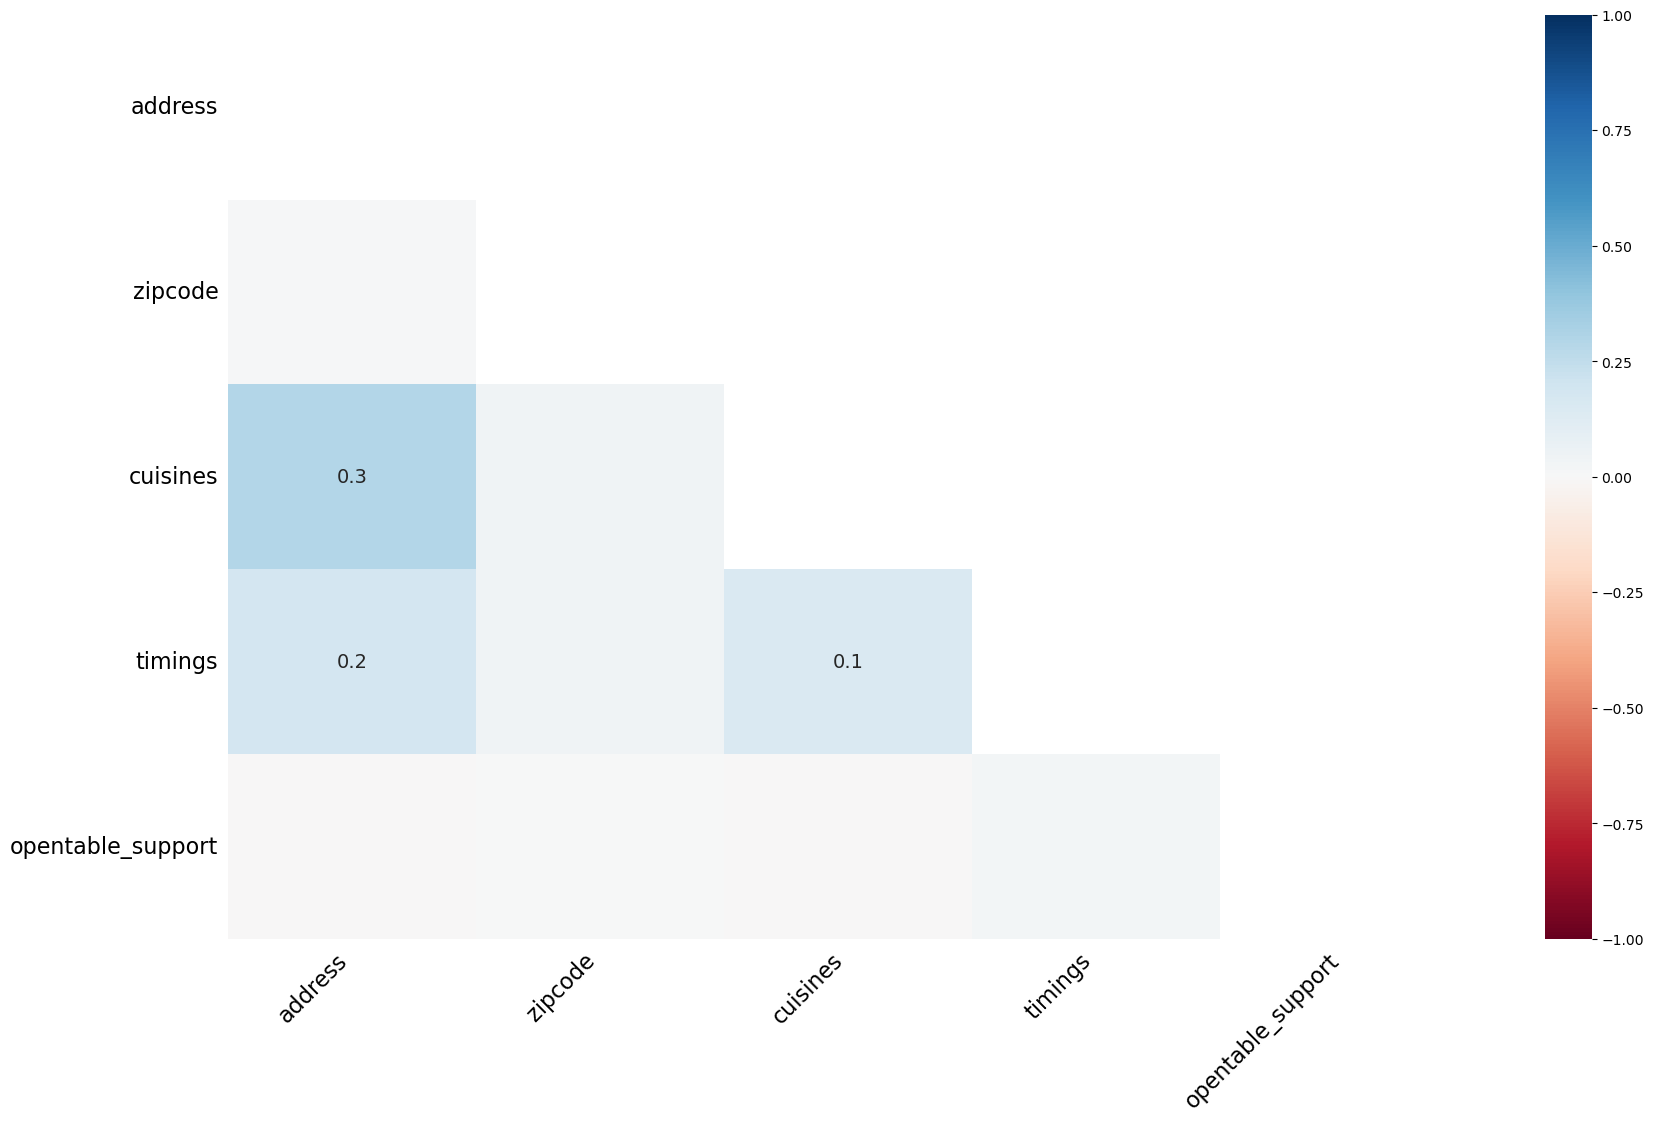

In [8]:

msno.heatmap(df)
plt.show()
#missing values correlation with each variables.
#it only shows the correlation where values are missing. Other columns are not displaying as they do not have missing values. 

# Data Cleaning and Preparation:

In [9]:
df.isnull().sum()/len(df)*100

res_id                   0.000000
name                     0.000000
establishment            0.000000
url                      0.000000
address                  0.063224
city                     0.000000
city_id                  0.000000
locality                 0.000000
latitude                 0.000000
longitude                0.000000
zipcode                 76.995338
country_id               0.000000
locality_verbose         0.000000
cuisines                 0.656305
timings                  1.827841
average_cost_for_two     0.000000
price_range              0.000000
currency                 0.000000
highlights               0.000000
aggregate_rating         0.000000
rating_text              0.000000
votes                    0.000000
photo_count              0.000000
opentable_support        0.022647
delivery                 0.000000
takeaway                 0.000000
dtype: float64

In [10]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [11]:
df.columns.str.strip()

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [12]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [13]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [14]:
df['opentable_support'].unique()

array([ 0., nan])

In [15]:
df['opentable_support'].replace ('nan', np.nan)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
211939    0.0
211940    0.0
211941    0.0
211942    0.0
211943    0.0
Name: opentable_support, Length: 211944, dtype: float64

In [16]:
df['opentable_support'].unique()

array([ 0., nan])

In [17]:
mean_column1 = df['opentable_support'].mean()

In [18]:
df['opentable_support'].fillna(mean_column1, inplace=True)

In [19]:
df['opentable_support'].unique()

array([0.])

In [20]:
df['zipcode'].unique()

array([nan, '282001.0', '282010.0', ..., '390008.0', '390013.0',
       '390004.0'], dtype=object)

In [21]:
df['zipcode'].replace ('nan', np.nan)

0              NaN
1         282001.0
2         282010.0
3         282002.0
4              NaN
            ...   
211939    390024.0
211940         NaN
211941         NaN
211942         NaN
211943    390007.0
Name: zipcode, Length: 211944, dtype: object

In [22]:
#removed this column as more than 50% data is absent and it has no used. 
df.drop('zipcode', axis=1, inplace=True)

In [23]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [24]:
df['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

In [25]:
df['rating_text'] = df['rating_text'].replace ('Dobré', 'Good').replace ('Baik', 'Good').replace('Sangat Baik', 'Very Good').replace('Sangat Baik', 'Very Good').replace('Excelente', 'Excellent').replace('Bardzo dobrze', 'Very Good').replace('Wybitnie', 'Remarkably').replace('Ottimo', 'Very Good').replace('Muito Bom', 'Very Good').replace('Velmi dobré', 'Very Good').replace('Skvělá volba', 'Good').replace('Muy Bueno', 'Very Good').replace('Bom', 'Good').replace('İyi', 'Good').replace('Çok iyi', 'Very Good').replace('Harika', 'Excellent').replace('Terbaik', 'Good').replace('Skvělé', 'Excellent').replace('Průměr', 'Average').replace('Ortalama', 'Average').replace('Bueno', 'Good').replace('Eccellente', 'Excellent').replace('Muito bom', 'Very Good').replace('Dobrze', 'Very Good').replace('Buono', 'Good').replace('Média', 'Average').replace('Scarso', 'Poor').replace('Promedio', 'Average').replace('Veľmi dobré', 'Very Good').replace('Vynikajúce', 'Excellent').replace('Średnio', 'Average').replace('Priemer', 'Very Good').replace('Biasa', 'Average').replace('Media', 'Average')
#convert all other languages into english language for better understanding of rating. 

In [26]:
df['rating_text']

0         Very Good
1         Very Good
2         Very Good
3         Very Good
4         Excellent
            ...    
211939    Very Good
211940    Very Good
211941    Very Good
211942         Good
211943    Very Good
Name: rating_text, Length: 211944, dtype: object

In [27]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [28]:
df['timings'].unique()

array(['8:30am – 10:30pm (Mon-Sun)',
       '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)',
       '9:30 AM to 11 PM', ..., '8am – 2:30pm, 5pm – 10pm (Mon-Sun)',
       '8am – 3pm, 6:30pm – 11pm (Mon-Sun)',
       '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)'],
      dtype=object)

In [29]:
df['days'] = df['timings'].str.extract(r'(\(.*?\))', expand=False)
df['days']

0                              (Mon-Sun)
1         (Mon, Wed, Thu, Fri, Sat, Sun)
2                                    NaN
3                              (Mon-Sun)
4                                    NaN
                       ...              
211939                         (Mon-Sun)
211940    (Mon, Tue, Wed, Fri, Sat, Sun)
211941                               NaN
211942                               NaN
211943                         (Mon-Sun)
Name: days, Length: 211944, dtype: object

In [30]:
df['days'].fillna('Not Defined', inplace=True)
df['days']

0                              (Mon-Sun)
1         (Mon, Wed, Thu, Fri, Sat, Sun)
2                            Not Defined
3                              (Mon-Sun)
4                            Not Defined
                       ...              
211939                         (Mon-Sun)
211940    (Mon, Tue, Wed, Fri, Sat, Sun)
211941                       Not Defined
211942                       Not Defined
211943                         (Mon-Sun)
Name: days, Length: 211944, dtype: object

In [31]:
df['days'] = df['days'].str.replace(r'[()]', '', regex=True)
df['days']

0                              Mon-Sun
1         Mon, Wed, Thu, Fri, Sat, Sun
2                          Not Defined
3                              Mon-Sun
4                          Not Defined
                      ...             
211939                         Mon-Sun
211940    Mon, Tue, Wed, Fri, Sat, Sun
211941                     Not Defined
211942                     Not Defined
211943                         Mon-Sun
Name: days, Length: 211944, dtype: object

In [32]:
df['timings'] = df['timings'].str.replace(r'(\(.*?\))', '', regex=True).str.strip()
df['timings']

0                                  8:30am – 10:30pm
1         12:30PM to 12Midnight , 1PM to 12Midnight
2                                  9:30 AM to 11 PM
3                                        8am – 11pm
4                              11:30 AM to 11:30 PM
                            ...                    
211939                    11am – 3pm, 7pm – 11:30pm
211940                   4pm – 11pm , 4pm – 11:30pm
211941        11:30 AM to 3:30 PM, 7:30 PM to 11 PM
211942                                 8 AM to 1 AM
211943                                   7am – 11pm
Name: timings, Length: 211944, dtype: object

In [33]:
df['timings'].head(15)

0                                    8:30am – 10:30pm
1           12:30PM to 12Midnight , 1PM to 12Midnight
2                                    9:30 AM to 11 PM
3                                          8am – 11pm
4                                11:30 AM to 11:30 PM
5                                   10:57 AM to 11 PM
6     11am – 10:35pm , 11am – 10:30pm ,11am – 10:45pm
7                                   10:57 AM to 11 PM
8                                        9 AM to 9 PM
9              12midnight – 1am, 11:30am – 12midnight
10                                          4pm – 1am
11                                   8:30am – 10:30pm
12                                     11 AM to 11 PM
13                               10:30 AM to 11:30 PM
14                                     10 AM to 11 PM
Name: timings, dtype: object

In [34]:
df['timings'] = df['timings'].str.replace ('â€“', '-').str.replace (' â€“ ', '-').str.replace('12Midnight', '00:00').str.replace('12noon', '12:00 PM').str.replace('12 noon', '12:00 PM').str.replace('PM', ' PM').str.replace('AM', ' AM').str.replace('pm', ' PM').str.replace('am', ' AM').str.replace('12 Midnight', '00:00')
df['timings']

0                                8:30 AM – 10:30 PM
1                 12:30 PM to 00:00 , 1 PM to 00:00
2                                9:30  AM to 11  PM
3                                      8 AM – 11 PM
4                            11:30  AM to 11:30  PM
                            ...                    
211939                11 AM – 3 PM, 7 PM – 11:30 PM
211940               4 PM – 11 PM , 4 PM – 11:30 PM
211941    11:30  AM to 3:30  PM, 7:30  PM to 11  PM
211942                               8  AM to 1  AM
211943                                 7 AM – 11 PM
Name: timings, Length: 211944, dtype: object

In [35]:
df['timings'] = df['timings'].str.replace('00:00', '00:00 AM')
df['timings']

0                                8:30 AM – 10:30 PM
1           12:30 PM to 00:00 AM , 1 PM to 00:00 AM
2                                9:30  AM to 11  PM
3                                      8 AM – 11 PM
4                            11:30  AM to 11:30  PM
                            ...                    
211939                11 AM – 3 PM, 7 PM – 11:30 PM
211940               4 PM – 11 PM , 4 PM – 11:30 PM
211941    11:30  AM to 3:30  PM, 7:30  PM to 11  PM
211942                               8  AM to 1  AM
211943                                 7 AM – 11 PM
Name: timings, Length: 211944, dtype: object

In [36]:
df['timings'] = df['timings'].str.replace('to', '-')
df['timings']

0                              8:30 AM – 10:30 PM
1           12:30 PM - 00:00 AM , 1 PM - 00:00 AM
2                               9:30  AM - 11  PM
3                                    8 AM – 11 PM
4                           11:30  AM - 11:30  PM
                           ...                   
211939              11 AM – 3 PM, 7 PM – 11:30 PM
211940             4 PM – 11 PM , 4 PM – 11:30 PM
211941    11:30  AM - 3:30  PM, 7:30  PM - 11  PM
211942                              8  AM - 1  AM
211943                               7 AM – 11 PM
Name: timings, Length: 211944, dtype: object

In [37]:
df['timings'].str.strip()
df['timings']

0                              8:30 AM – 10:30 PM
1           12:30 PM - 00:00 AM , 1 PM - 00:00 AM
2                               9:30  AM - 11  PM
3                                    8 AM – 11 PM
4                           11:30  AM - 11:30  PM
                           ...                   
211939              11 AM – 3 PM, 7 PM – 11:30 PM
211940             4 PM – 11 PM , 4 PM – 11:30 PM
211941    11:30  AM - 3:30  PM, 7:30  PM - 11  PM
211942                              8  AM - 1  AM
211943                               7 AM – 11 PM
Name: timings, Length: 211944, dtype: object

In [38]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,days
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1,"Mon, Wed, Thu, Fri, Sat, Sun"
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1,Not Defined
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1,Mon-Sun
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1,Not Defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1,Mon-Sun
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1,"Mon, Tue, Wed, Fri, Sat, Sun"
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1,Not Defined
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1,Not Defined


In [39]:
df['establishment'] = df['establishment'].str.replace('[', '').str.replace(']', '').str.replace("''", "").str.replace("'", '')
df['establishment']

0           Quick Bites
1           Quick Bites
2           Quick Bites
3           Quick Bites
4         Casual Dining
              ...      
211939    Casual Dining
211940      Quick Bites
211941    Casual Dining
211942      Quick Bites
211943             Café
Name: establishment, Length: 211944, dtype: object

In [40]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
211939     True
211940    False
211941     True
211942    False
211943     True
Length: 211944, dtype: bool

In [41]:
df.duplicated().sum()

151996

In [42]:
df= df.drop_duplicates(keep= "first")


In [43]:

df.duplicated().sum()

0

In [44]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,days
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1,"Mon, Wed, Thu, Fri, Sat, Sun"
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1,Not Defined
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1,Mon-Sun
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1,Not Defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,Dessert Parlour,https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1,Not Defined
211925,18984164,The Grand Thakar,Casual Dining,https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1,Not Defined
211926,18019952,Geeta lodge,Casual Dining,https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1,Not Defined
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1,"Mon, Tue, Wed, Fri, Sat, Sun"


In [45]:
df['locality_verbose'] = df['locality_verbose'].str.replace(r',\s[^,]*$', '', regex=True)

df['locality_verbose']

0            Khandari
1          Agra Cantt
2            Shahganj
3         Civil Lines
4             Tajganj
             ...     
211882      Manjalpur
211925       Alkapuri
211926       Alkapuri
211940     Karelibaug
211942          Akota
Name: locality_verbose, Length: 59948, dtype: object

In [46]:
#df.to_csv('3cleaned.csv')

In [47]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,days
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1,"Mon, Wed, Thu, Fri, Sat, Sun"
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1,Not Defined
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1,Mon-Sun
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1,Not Defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,Dessert Parlour,https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1,Not Defined
211925,18984164,The Grand Thakar,Casual Dining,https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1,Not Defined
211926,18019952,Geeta lodge,Casual Dining,https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1,Not Defined
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1,"Mon, Tue, Wed, Fri, Sat, Sun"


In [48]:
#df.to_csv('my.csv')

In [49]:
df['cuisines_list'] = df['cuisines'].str.split(',')
#converted into a list so we can separate it through explode. 

In [50]:
df['cuisines_list']

0         [North Indian,  South Indian,  Mithai,  Street...
1         [North Indian,  Mughlai,  Rolls,  Chinese,  Fa...
2                                      [Fast Food,  Mithai]
3            [Desserts,  Bakery,  Fast Food,  South Indian]
4                    [North Indian,  Continental,  Italian]
                                ...                        
211882                                          [Ice Cream]
211925                  [Gujarati,  North Indian,  Chinese]
211926                             [Gujarati,  Street Food]
211940                                          [Fast Food]
211942                       [Fast Food,  Sandwich,  Salad]
Name: cuisines_list, Length: 59948, dtype: object

In [51]:
df = df.explode('cuisines_list')

In [52]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,days,cuisines_list
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,North Indian
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,South Indian
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,Mithai
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,Street Food
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,Desserts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211926,18019952,Geeta lodge,Casual Dining,https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1,Not Defined,Street Food
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1,"Mon, Tue, Wed, Fri, Sat, Sun",Fast Food
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1,Not Defined,Fast Food
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1,Not Defined,Sandwich


In [53]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,days,cuisines_list
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,North Indian
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,South Indian
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,Mithai
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,Street Food
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,Desserts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211926,18019952,Geeta lodge,Casual Dining,https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1,Not Defined,Street Food
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1,"Mon, Tue, Wed, Fri, Sat, Sun",Fast Food
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1,Not Defined,Fast Food
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1,Not Defined,Sandwich


In [54]:
df.duplicated().sum()

0

In [55]:
df['timings'].isnull().sum()

2035

In [56]:
df['timings'].unique()

array(['8:30 AM – 10:30 PM', '12:30 PM - 00:00 AM , 1 PM - 00:00 AM',
       '9:30  AM - 11  PM', ..., '8 AM – 2:30 PM, 5 PM – 10 PM',
       '8 AM – 3 PM, 6:30 PM – 11 PM', '4 PM – 11 PM , 4 PM – 11:30 PM'],
      dtype=object)

In [57]:
df['timings'].fillna('Not Defined', inplace=True)

In [58]:
df['timings'].isnull().sum()

0

In [59]:
df['cuisines'].isnull().sum()

470

In [60]:
df_cleaned = df.dropna(subset=['cuisines'])
df_cleaned

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,days,cuisines_list
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,North Indian
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,South Indian
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,Mithai
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,Street Food
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,Mon-Sun,Desserts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211926,18019952,Geeta lodge,Casual Dining,https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1,Not Defined,Street Food
211940,3200996,Raju Omlet,Quick Bites,https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1,"Mon, Tue, Wed, Fri, Sat, Sun",Fast Food
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1,Not Defined,Fast Food
211942,3201138,Subway,Quick Bites,https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1,Not Defined,Sandwich


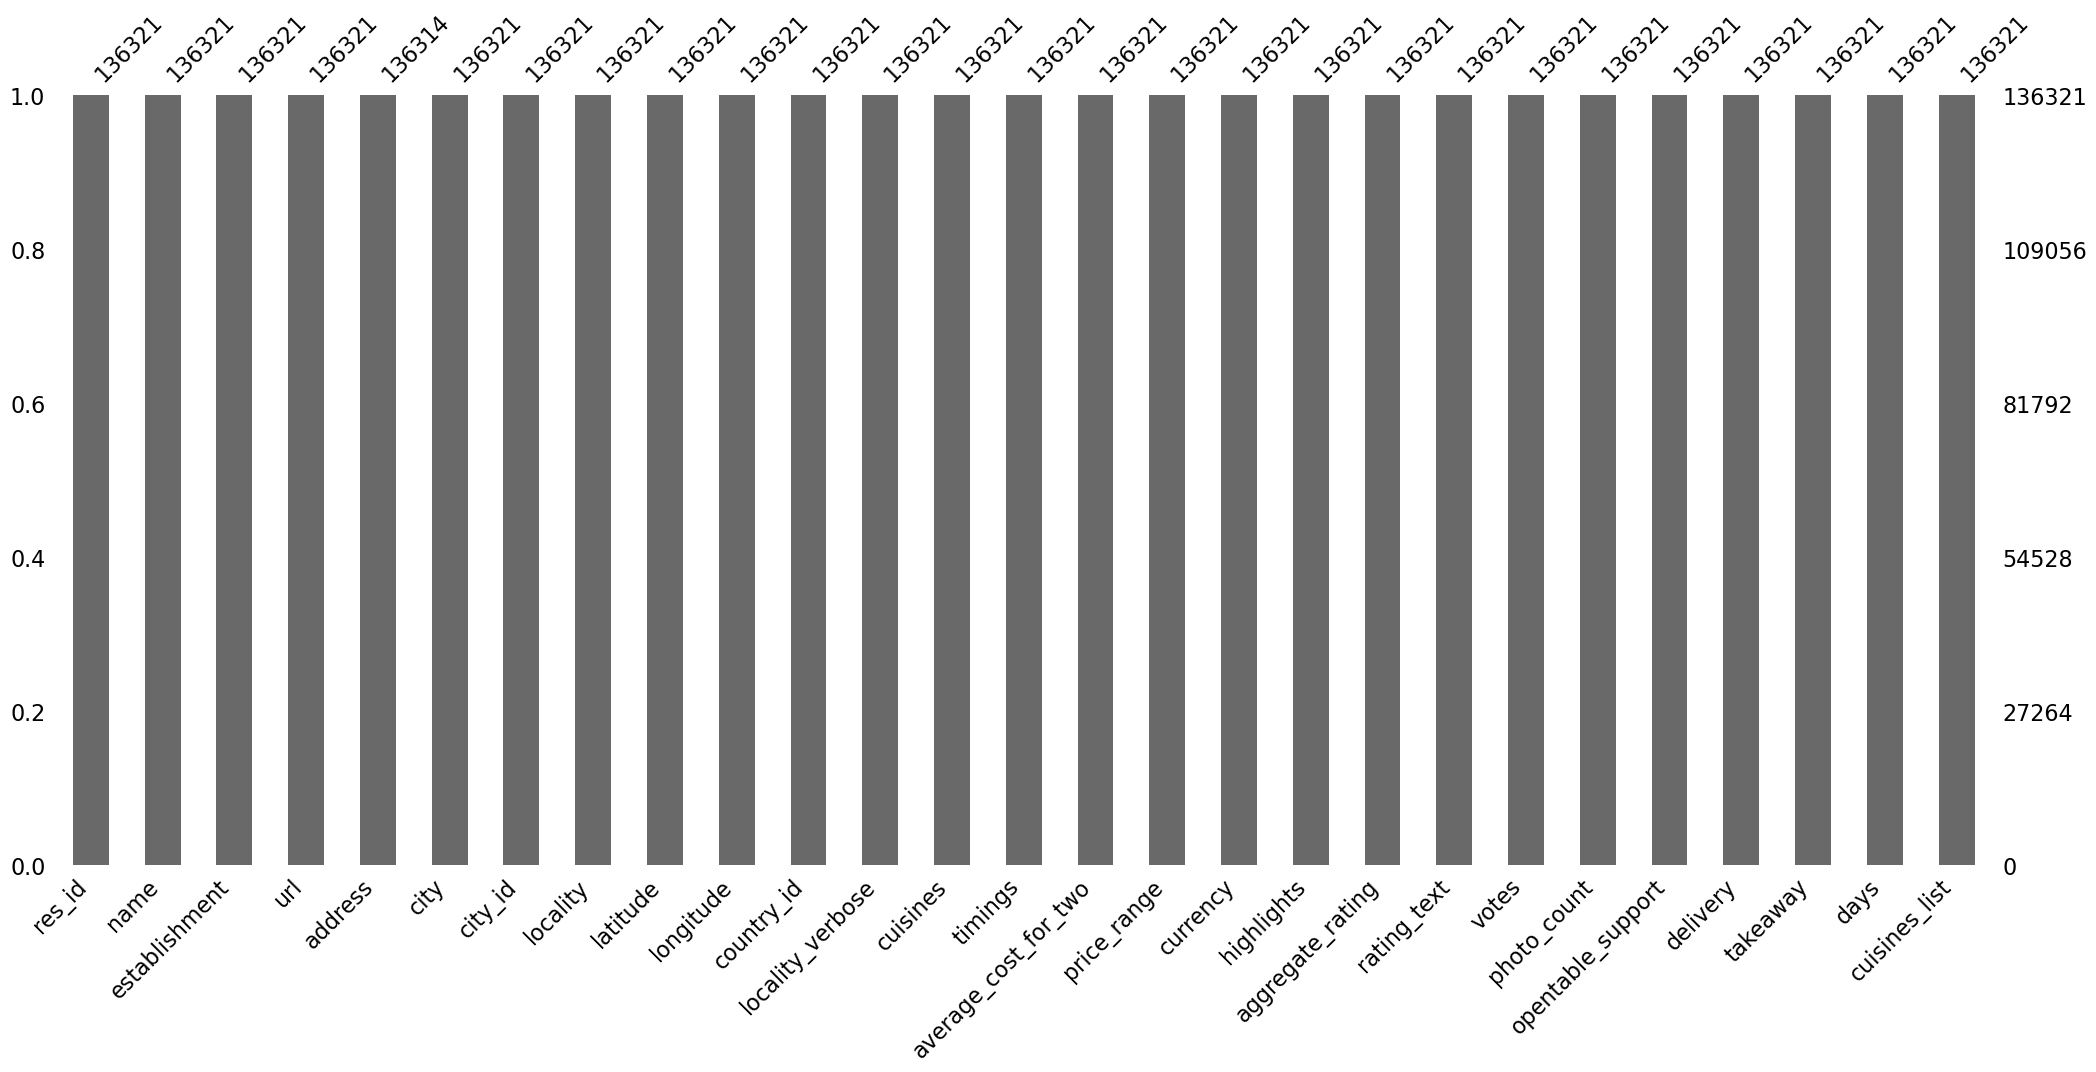

In [61]:
bar=msno.bar(df_cleaned)
#after removing and cleaning daa we can almost each column has no missing value. 

<Axes: >

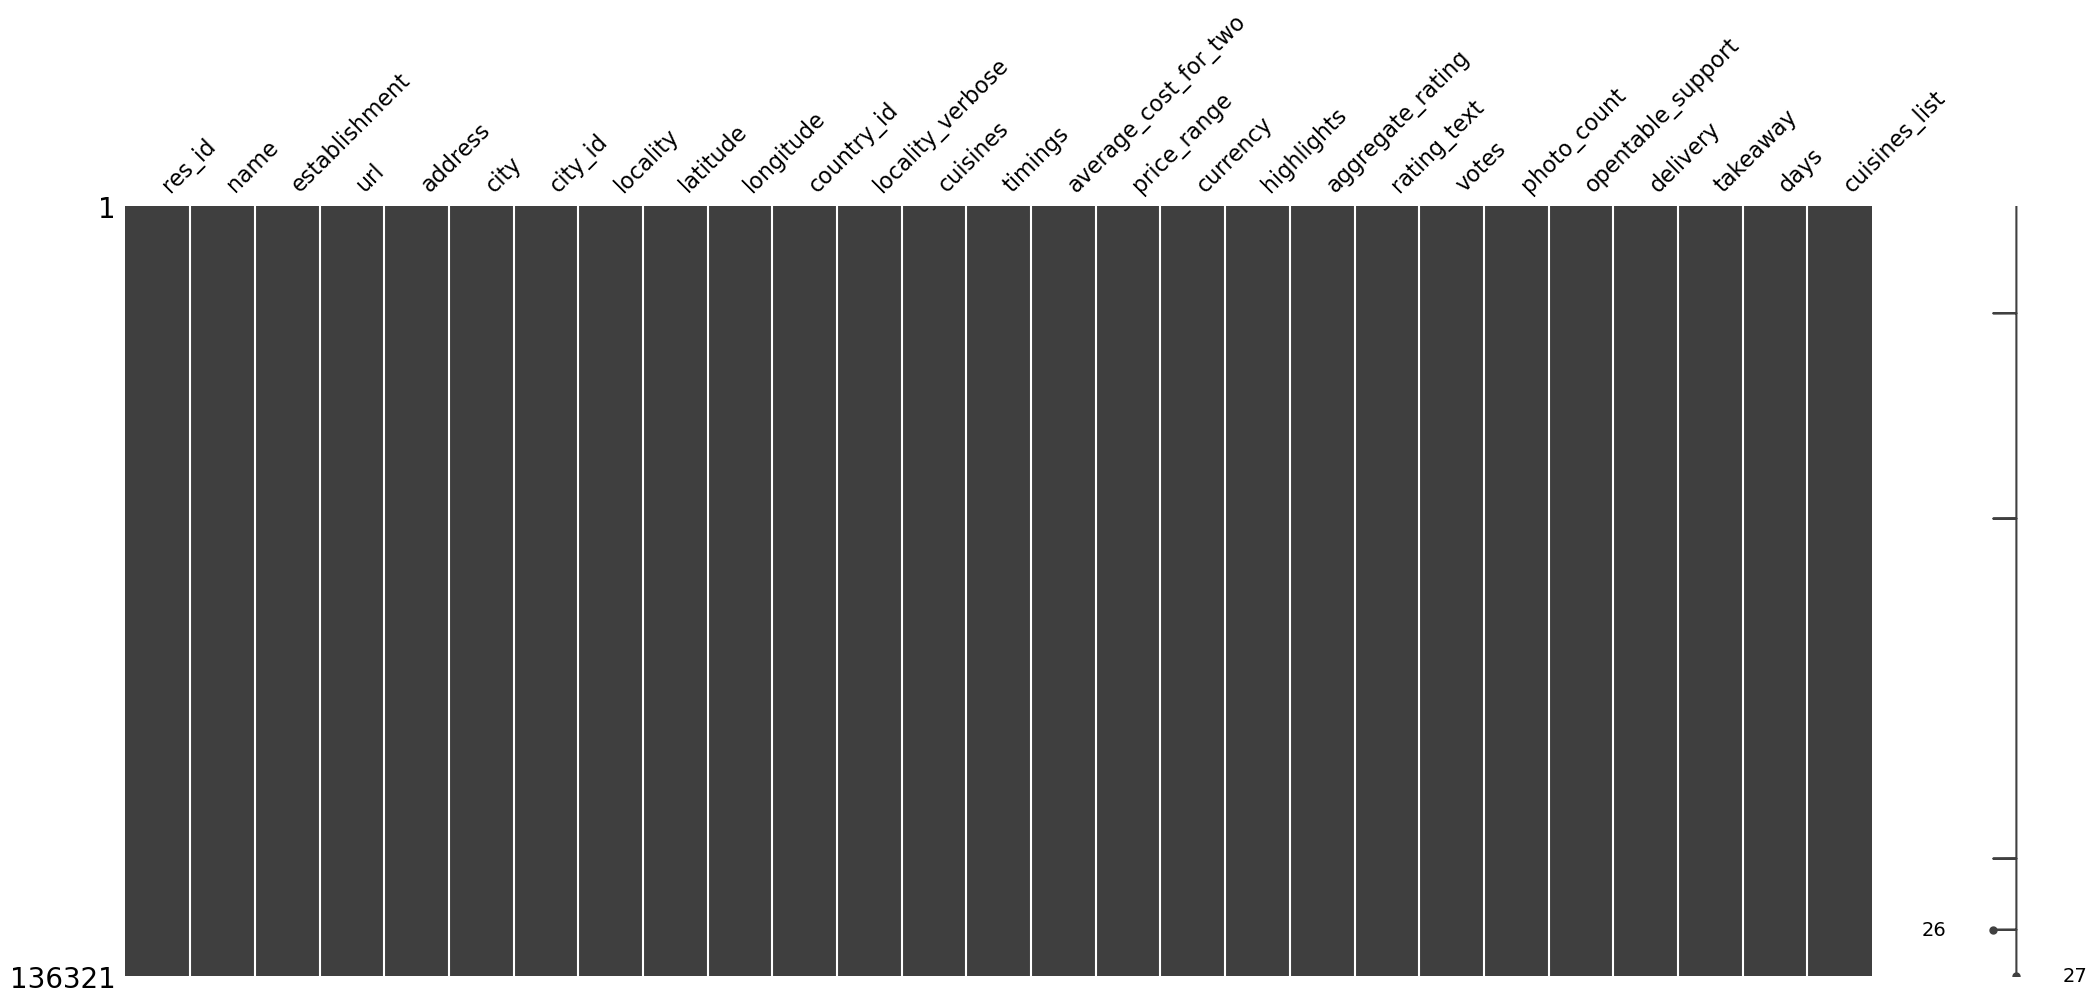

In [62]:
msno.matrix(df_cleaned)
#here we can see there is no relationship between missing values with other features. 

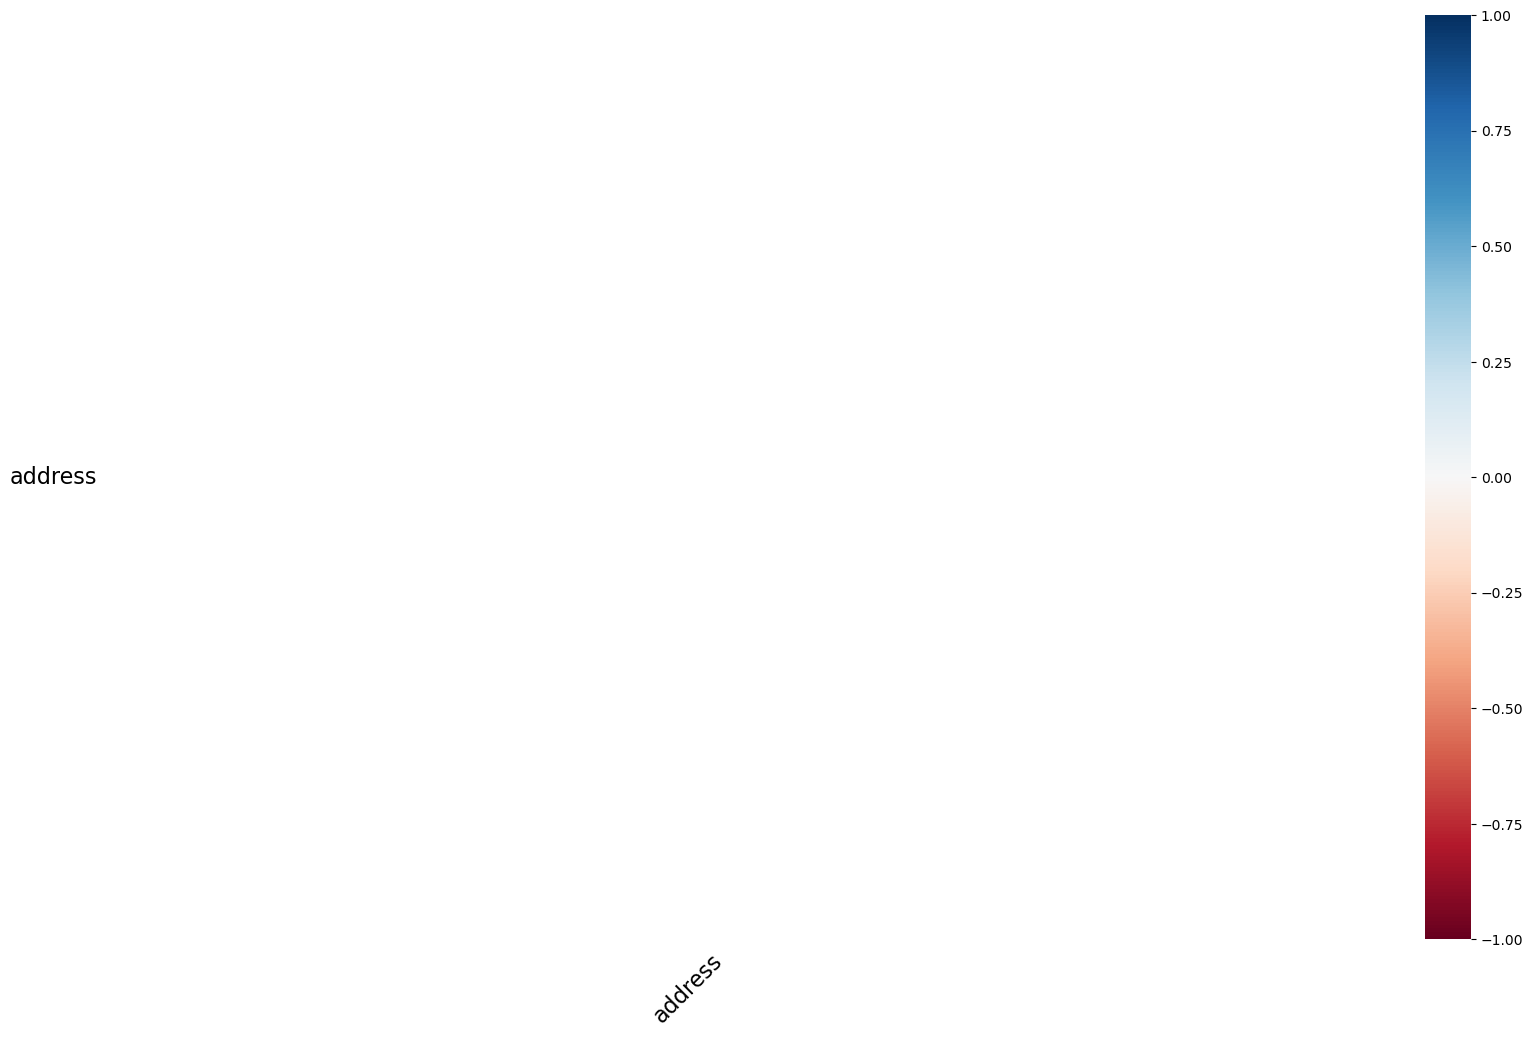

In [63]:
msno.heatmap(df_cleaned)
plt.show()
#this graph only showing those column where is the missing value. 

In [64]:
#df_cleaned.to_csv('newsheetkhansa.csv')

# Exploratory Data Analysis

#Descriptive Statistics: Summarize the central tendency, dispersion, and shape of the dataset's distribution.

In [65]:
df_cleaned.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,1.363210e+05,136321.000000,136321.000000,136321.000000,136321.0,136321.000000,136321.000000,136321.000000,136321.000000,136321.000000,136321.0,136321.000000,136321.0
mean,1.259216e+07,2974.081660,21.249217,76.734191,1.0,627.103425,1.892826,3.261203,355.644237,281.554889,0.0,-0.307121,-1.0
std,8.306997e+06,4964.724151,54.489684,9.940496,0.0,620.690484,0.907108,1.301838,901.941265,863.070666,0.0,0.948779,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,2.700478e+06,6.000000,15.538213,74.634723,1.0,250.000000,1.000000,3.200000,12.000000,3.000000,0.0,-1.000000,-1.0
50%,1.862472e+07,22.000000,21.245131,77.161622,1.0,450.000000,2.000000,3.700000,74.000000,22.000000,0.0,-1.000000,-1.0
75%,1.881887e+07,11289.000000,26.723065,79.929463,1.0,800.000000,2.000000,4.000000,323.000000,155.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [66]:
df_cleaned.describe(include=['object'])

,name,establishment,url,address,city,locality,locality_verbose,cuisines,timings,currency,highlights,rating_text,days,cuisines_list
count,136321,136321,136321,136314,136321,136321,136321,136321,136321,136321,136321,136321,136321,136321
unique,40757,27,55098,50271,99,3727,3727,9382,6710,1,31394,7,317,248
top,Cafe Coffee Day,Casual Dining,https://www.zomato.com/ColabaSocial?utm_source...,"Laxman Jhula, Tapovan, Rishikesh",Mumbai,Civil Lines,Civil Lines,North Indian,11 AM - 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Good,Not Defined,North Indian
freq,1290,38110,49,75,7267,1652,1652,4564,19261,136321,1600,42350,89097,13918


In [67]:
df_cleaned.shape

(136321, 27)

#Distribution Analysis: Analyze the distribution of key variables (e.g., ratings, price range, cuisines).

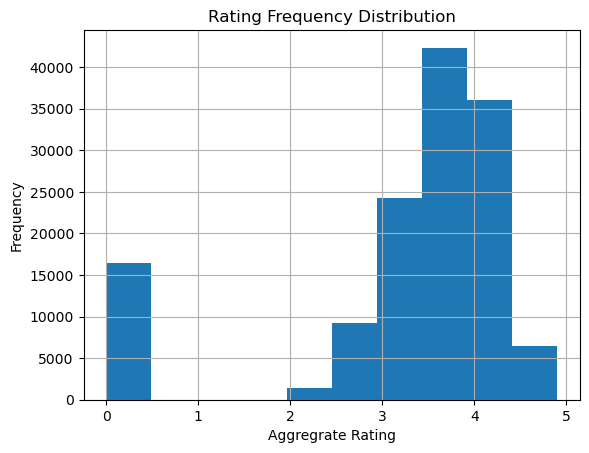

In [68]:
df_cleaned['aggregate_rating'].hist()

plt.xlabel('Aggregrate Rating')
plt.ylabel('Frequency')
plt.title('Rating Frequency Distribution')
plt.show()

# here we are not removing the 0 because it shows the data which has not rated by the customers and it is not considered as the outliers. 

<Axes: >

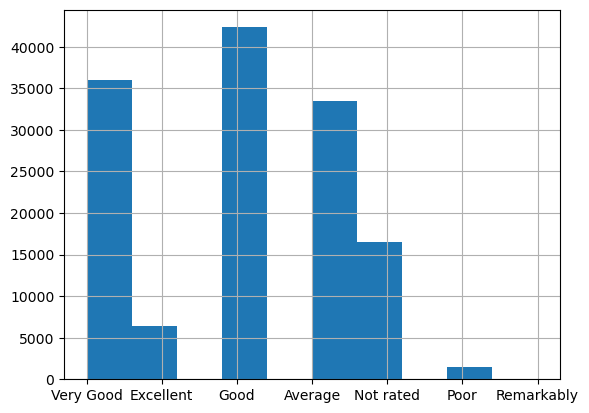

In [69]:
df_cleaned['rating_text'].hist()



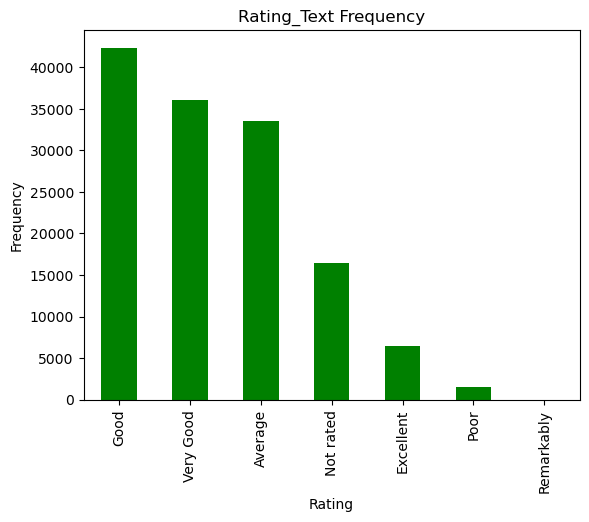

In [70]:
rating_text_counts = df_cleaned['rating_text'].value_counts()
rating_text_counts.head(10).plot(kind= 'bar', color ='green')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('Rating_Text Frequency')
plt.show()


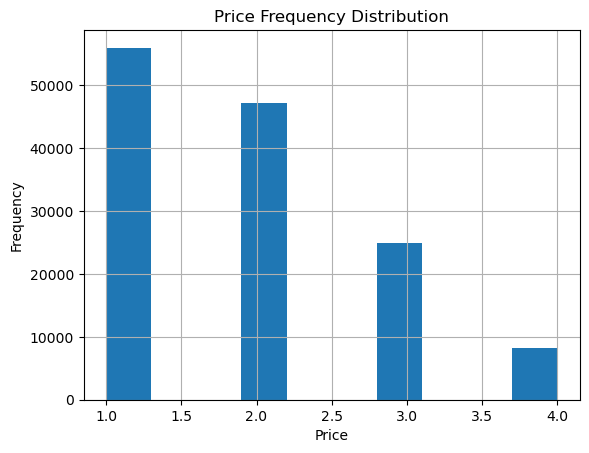

In [71]:
df_cleaned['price_range'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Frequency Distribution')
plt.show()

#the distribution is positively skewed. so in featuring engineering we will do normalization. 

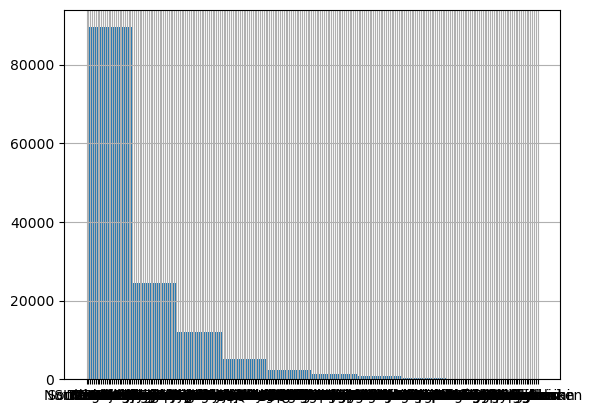

In [72]:
df_cleaned['cuisines_list'].hist()
plt.show()

#here we can see the distribution is positively skewed. AS it is a categorical column and its distribution, we will use nominal
#coding method i.e. one hot coding for feature engineering so our model will understand it.

In [73]:
cousine_counts = df_cleaned['cuisines_list'].value_counts()
#just for better representation. 

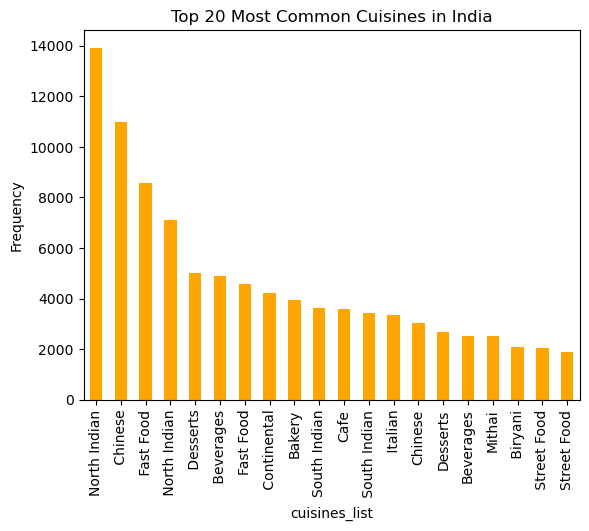

In [74]:
cousine_counts.head(20).plot(kind= 'bar', color ='orange')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Cuisines in India')
plt.show()


In [75]:
numeric_df_cleaned = df.select_dtypes(include=[np.number])

In [76]:
corr = numeric_df_cleaned.corr()
corr

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
res_id,1.000000,0.449443,0.009443,-0.062081,NaN,-0.174513,-0.164681,-0.227928,-0.186898,-0.079881,NaN,0.027413,NaN
city_id,0.449443,1.000000,0.014890,-0.055741,NaN,-0.227325,-0.221425,-0.281048,-0.201417,-0.188346,NaN,-0.030317,NaN
latitude,0.009443,0.014890,1.000000,0.002111,NaN,-0.002838,-0.002318,0.004334,-0.006428,-0.002630,NaN,0.003960,NaN
longitude,-0.062081,-0.055741,0.002111,1.000000,NaN,-0.030301,-0.041994,0.121903,0.018541,0.005810,NaN,0.088090,NaN
country_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_cost_for_two,-0.174513,-0.227325,-0.002838,-0.030301,NaN,1.000000,0.793984,0.262470,0.278188,0.344466,NaN,-0.070631,NaN
price_range,-0.164681,-0.221425,-0.002318,-0.041994,NaN,0.793984,1.000000,0.263490,0.254635,0.307873,NaN,-0.072473,NaN
aggregate_rating,-0.227928,-0.281048,0.004334,0.121903,NaN,0.262470,0.263490,1.000000,0.278544,0.250615,NaN,0.197528,NaN
votes,-0.186898,-0.201417,-0.006428,0.018541,NaN,0.278188,0.254635,0.278544,1.000000,0.679454,NaN,0.052304,NaN
photo_count,-0.079881,-0.188346,-0.002630,0.005810,NaN,0.344466,0.307873,0.250615,0.679454,1.000000,NaN,0.025419,NaN


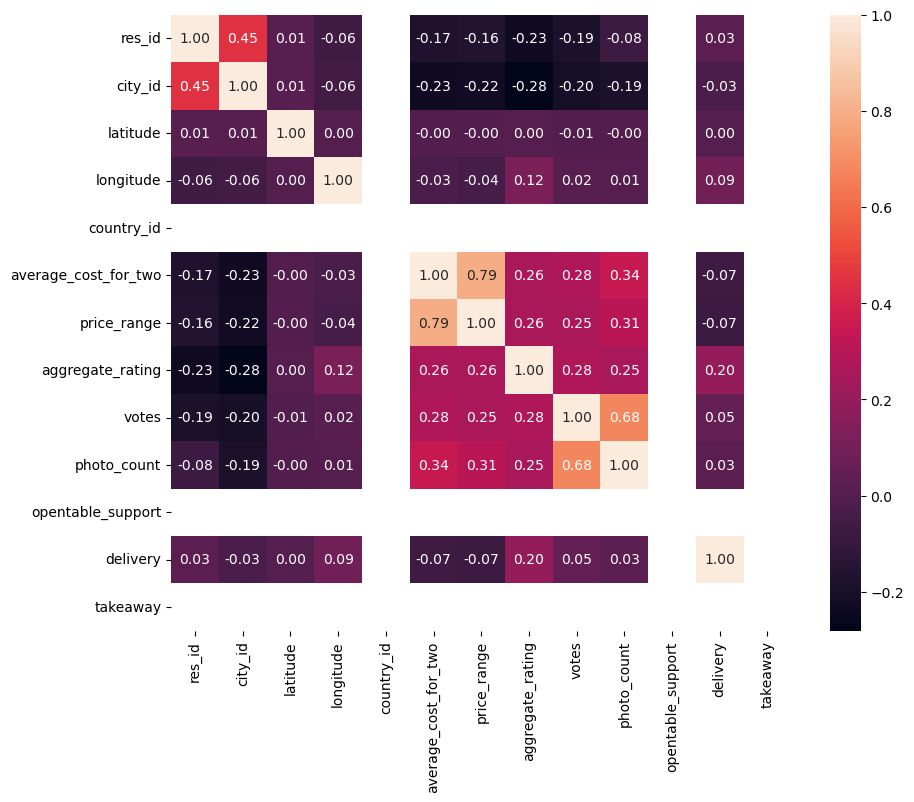

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

#here in this heatmap we can see the correlation between variables. Here we can see there is correlation between variables 
#but a weak correlation. Howeever, in two columns there is a strong correlation which is  Price_Range and Average Cost of two. 
#other one is photo and photo_count. If we want to perform a linera regresssion for these two it should have low correlation 
#The reason is that liner regression it must be necessary that eacf feature is independent. For this we have to treat them. 

# Regional Analysis

#Compare the restaurant trends and customer preferences across different cities or regions in India.

In [78]:
average_cost_by_city = df_cleaned.groupby('city')['average_cost_for_two'].mean()

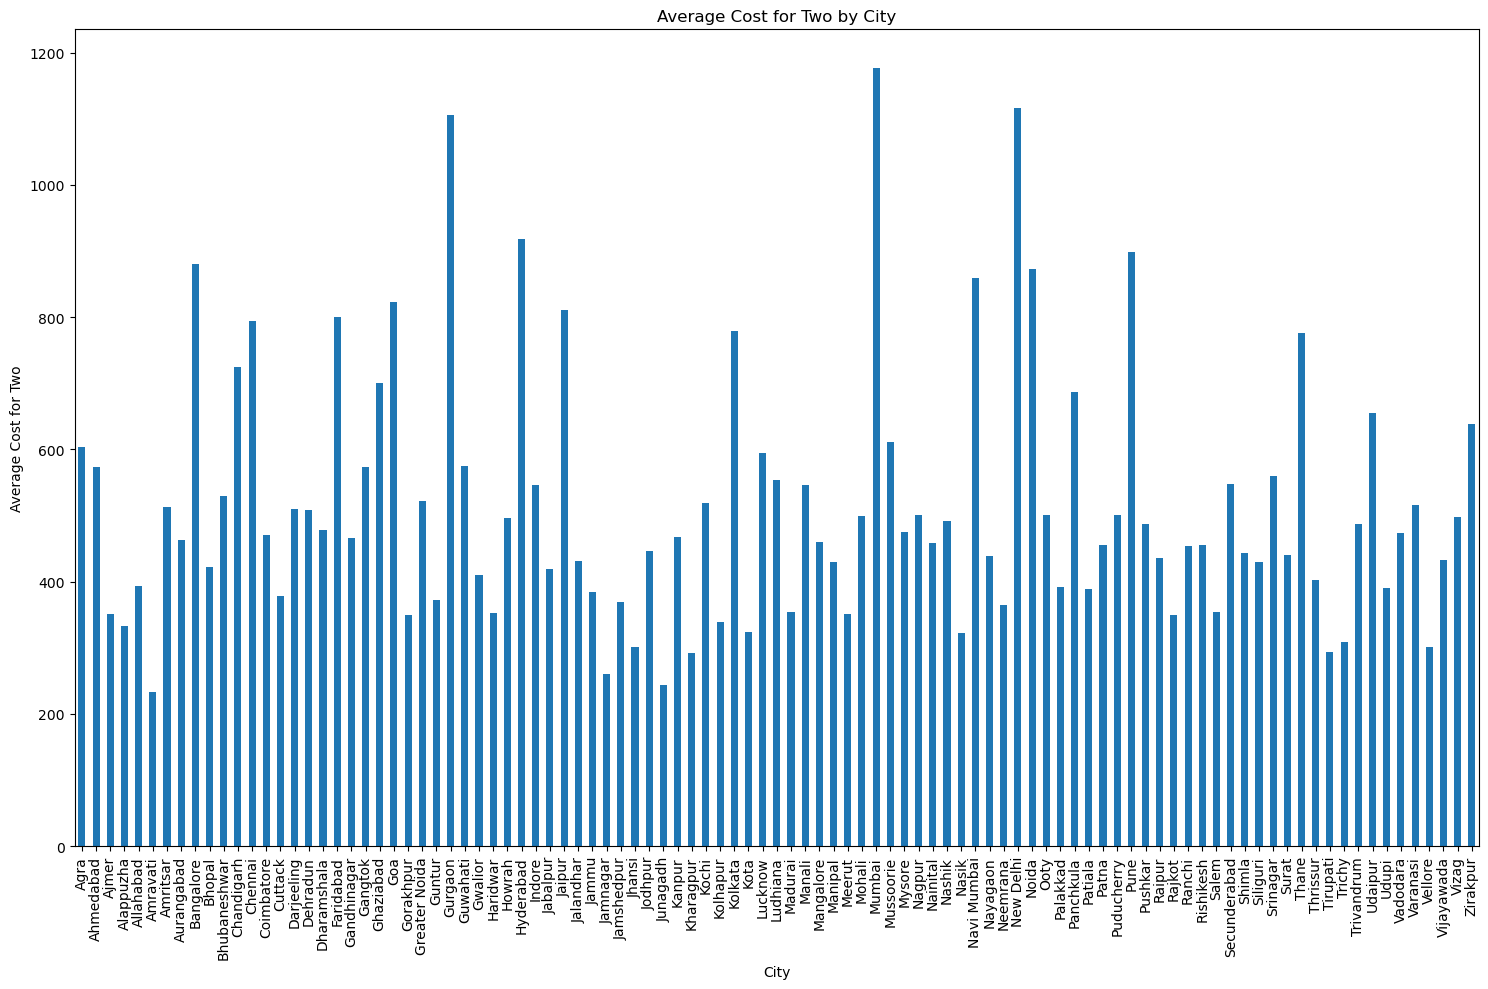

In [79]:
plt.figure(figsize=(15, 10))
average_cost_by_city.plot(kind='bar')
plt.title('Average Cost for Two by City')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=90)  # Rotate city names for better visibility
plt.tight_layout()  # Adjust layout to fit all city names
plt.show()



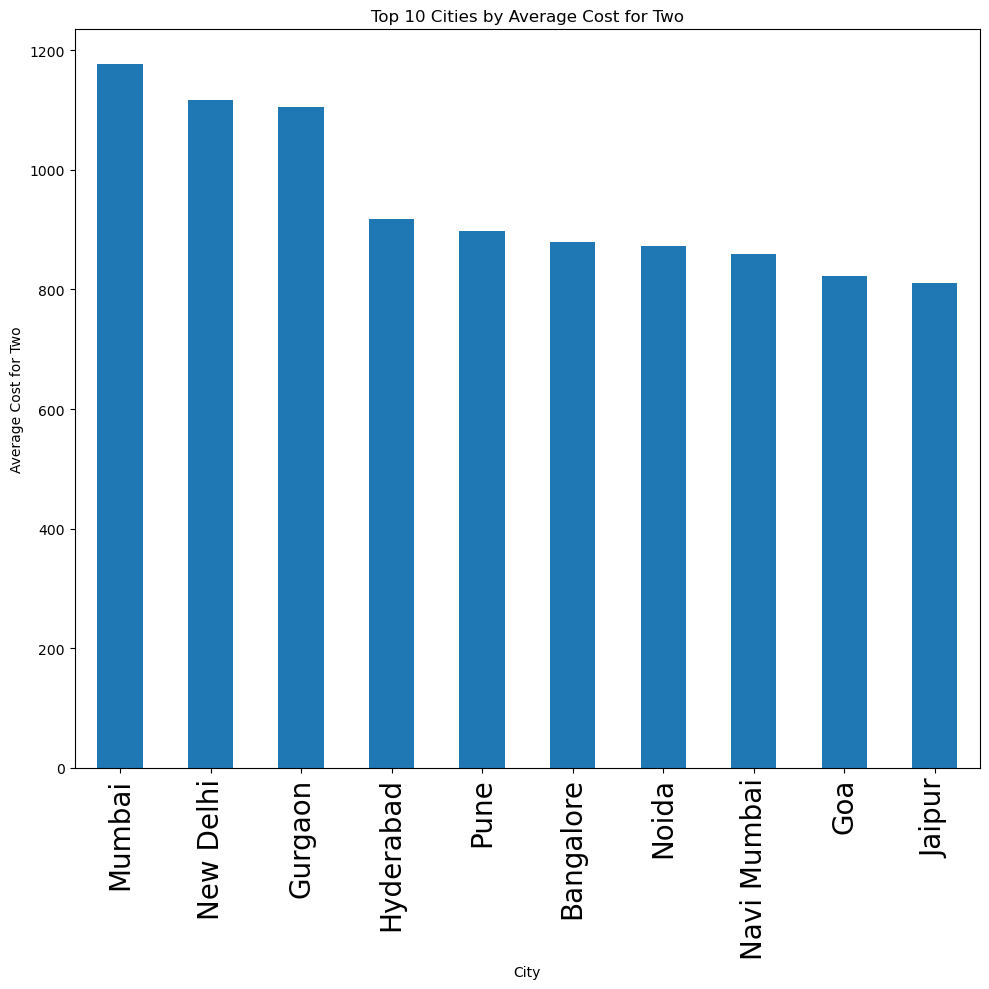

In [80]:
top_10_average_cost_by_city = average_cost_by_city.nlargest(10)


plt.figure(figsize=(10, 10))
top_10_average_cost_by_city.plot(kind='bar')
plt.title('Top 10 Cities by Average Cost for Two')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=90, fontsize= 20)  # Rotate city names for better visibility
plt.tight_layout()  # Adjust layout to fit all city names
plt.show()

In [81]:
average_rating_by_city = df_cleaned.groupby('city')['aggregate_rating'].mean()
average_rating_by_city

city
Agra          3.038234
Ahmedabad     3.389112
Ajmer         3.049728
Alappuzha     0.584876
Allahabad     2.941411
                ...   
Varanasi      3.187862
Vellore       2.318281
Vijayawada    3.263920
Vizag         3.313144
Zirakpur      3.096648
Name: aggregate_rating, Length: 99, dtype: float64

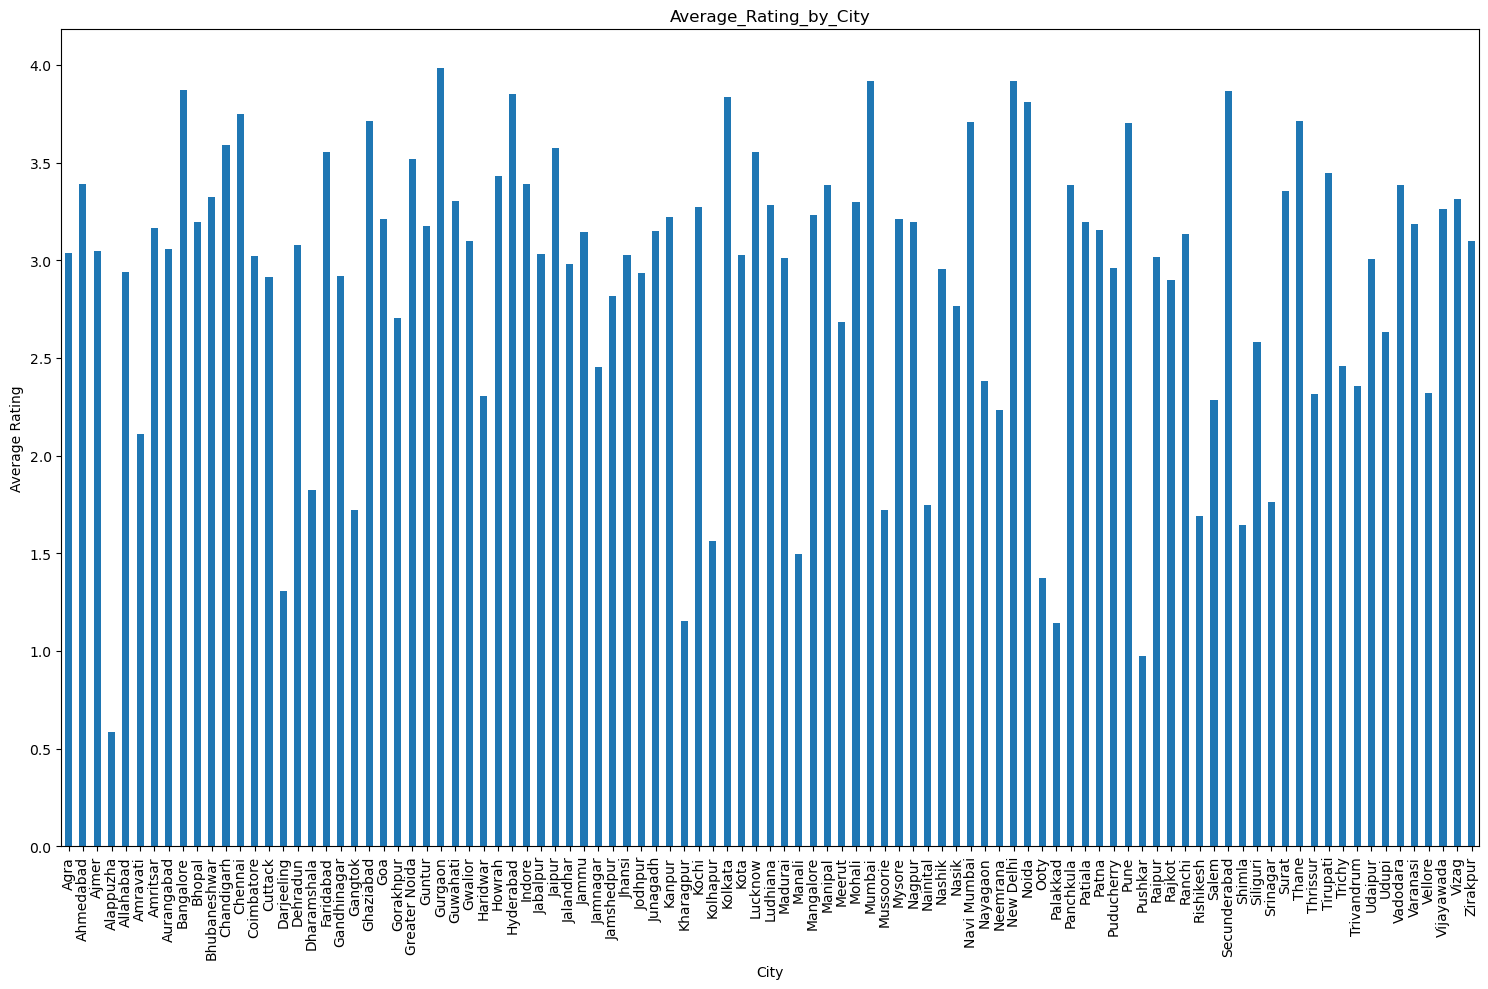

In [82]:
plt.figure(figsize=(15, 10))
average_rating_by_city.plot(kind='bar')
plt.title('Average_Rating_by_City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

#This is a negatively skewed curve and 

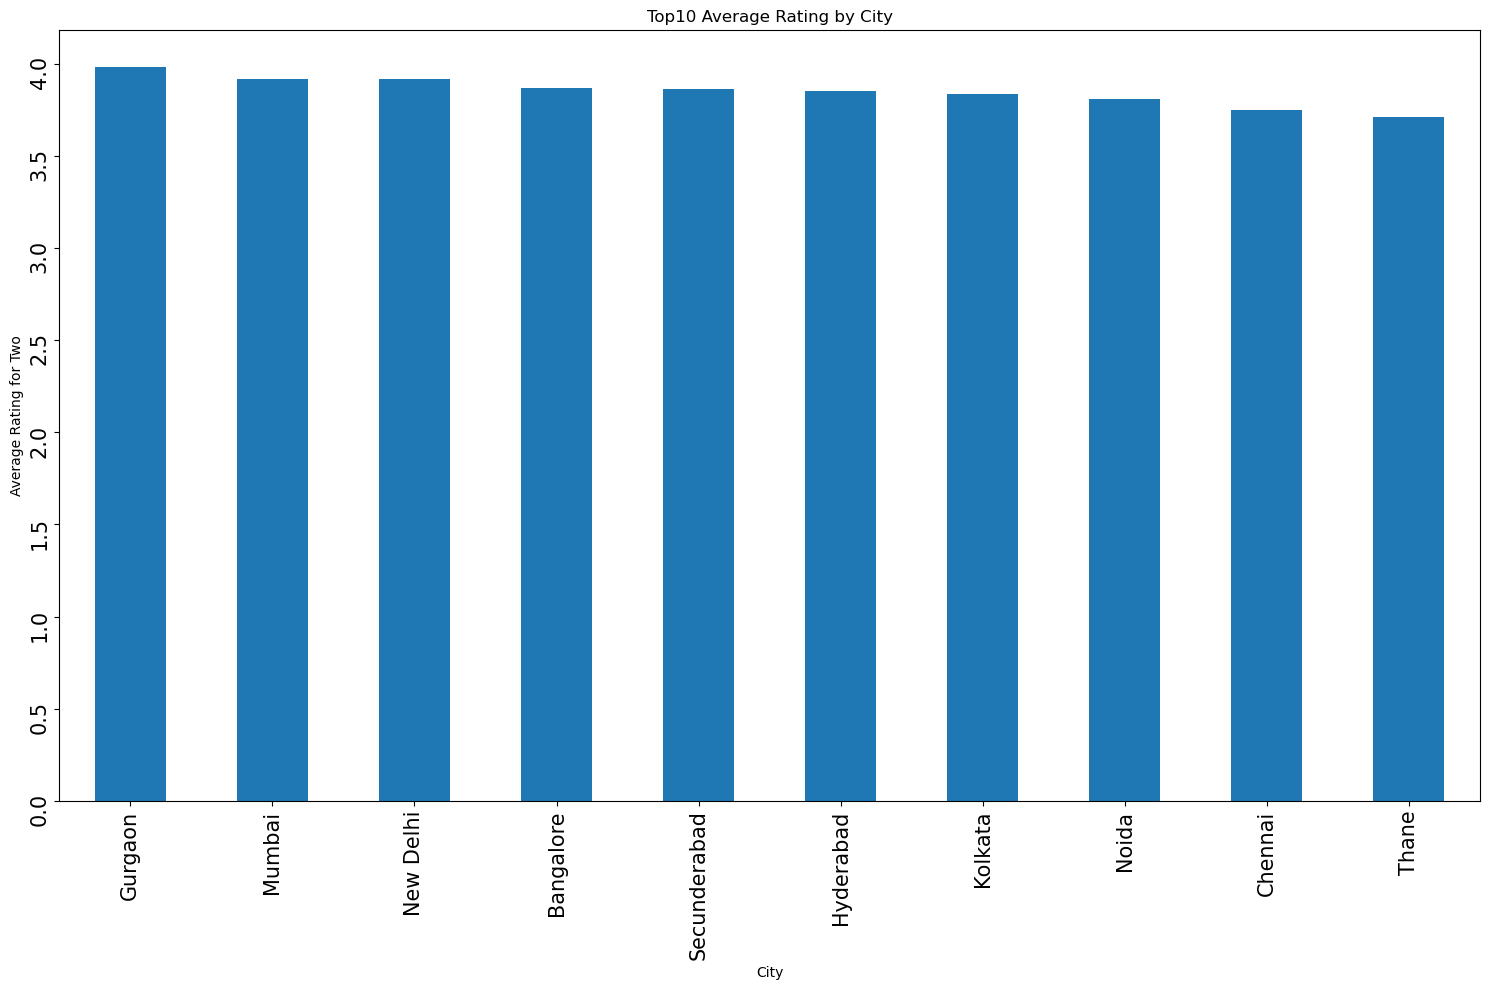

In [83]:
top_10_average_rating_by_city = average_rating_by_city.nlargest(10)


plt.figure(figsize=(15, 10))
top_10_average_rating_by_city.plot(kind='bar')
plt.title('Top10 Average Rating by City')
plt.xlabel('City')
plt.ylabel('Average Rating for Two')
plt.xticks(rotation=90, fontsize= 15)
plt.yticks(rotation=90, fontsize= 15)
plt.tight_layout()  
plt.show()

In [84]:
cu_list= df_cleaned.groupby('city')['cuisines_list'].count()
cu_list

city
Agra          1789
Ahmedabad     2544
Ajmer         1104
Alappuzha      443
Allahabad     1077
              ... 
Varanasi      1277
Vellore        733
Vijayawada    1505
Vizag         1651
Zirakpur       358
Name: cuisines_list, Length: 99, dtype: int64

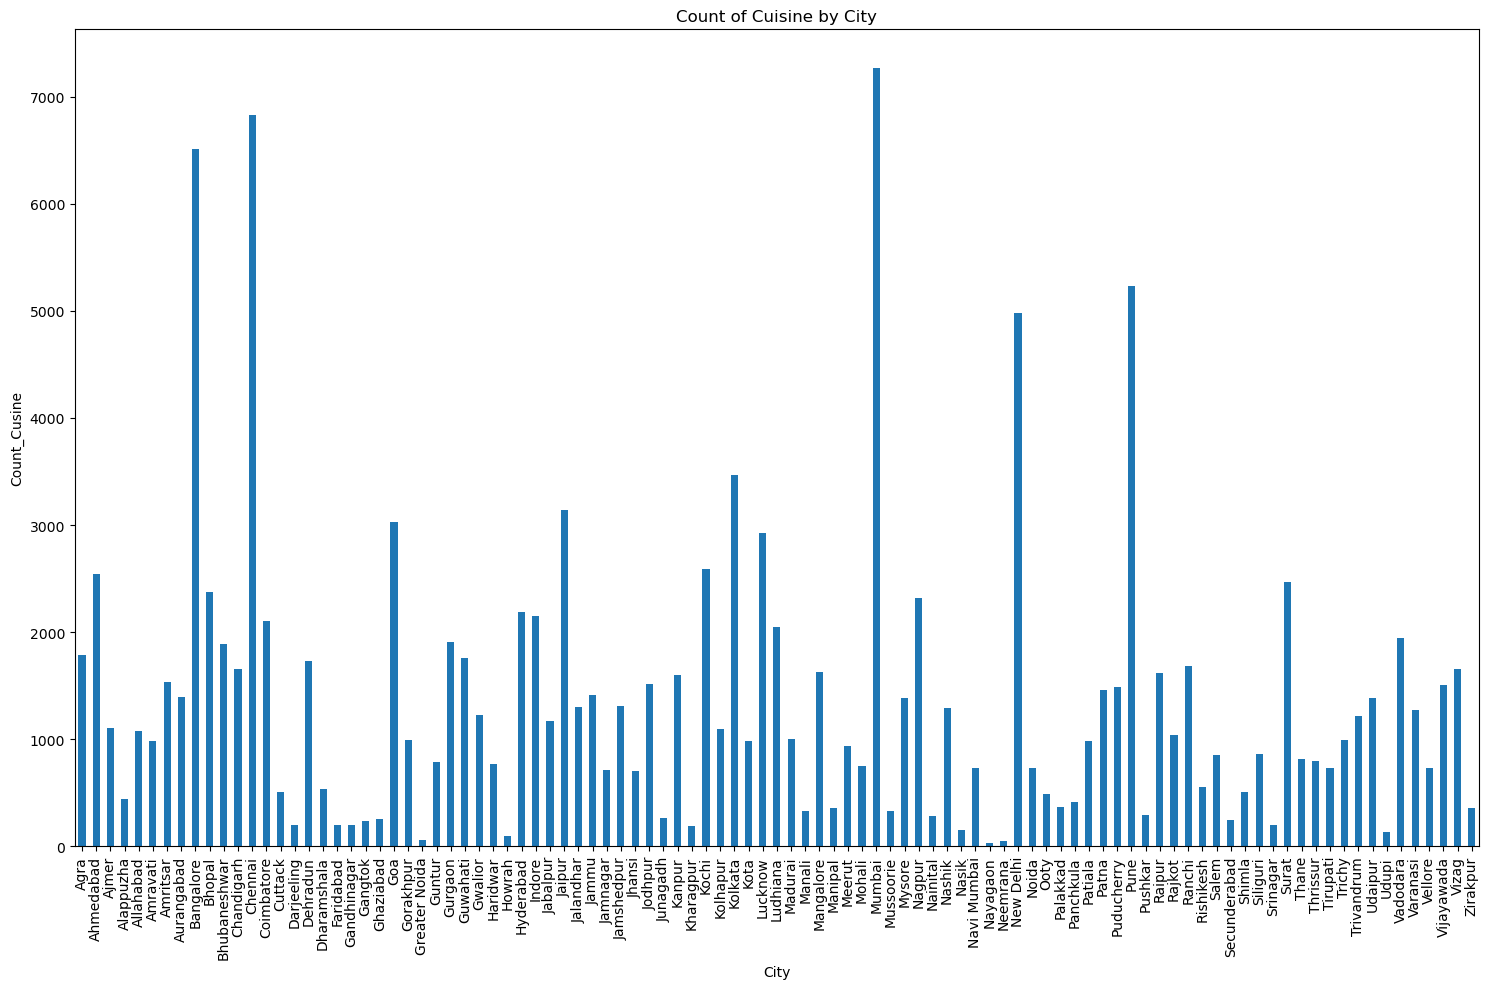

In [85]:
plt.figure(figsize=(15, 10))
cu_list.plot(kind='bar')
plt.title('Count of Cuisine by City')
plt.xlabel('City')
plt.ylabel('Count_Cusine')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


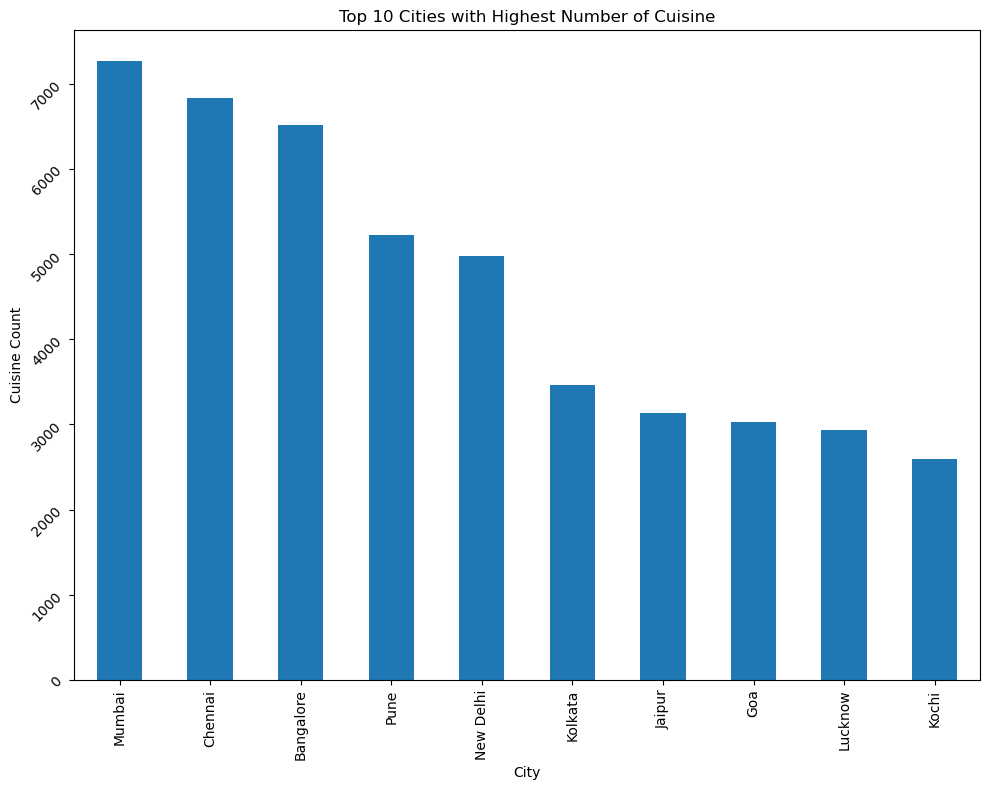

In [86]:
top_10_cuisine_by_city = cu_list.nlargest(10)

plt.figure(figsize=(10, 8))
top_10_cuisine_by_city.plot(kind='bar')
plt.title('Top 10 Cities with Highest Number of Cuisine')
plt.xlabel('City')
plt.ylabel('Cuisine Count')
plt.xticks(rotation=90, fontsize= 10)  
plt.yticks(rotation=45, fontsize= 10)  
plt.tight_layout() 
plt.show()
#Cuisine Diversity

In [87]:
popular_cuisines = df_cleaned.groupby('cuisines_list')['cuisines_list'].count()
popular_cuisines

cuisines_list
 Afghan       107
 Afghani        1
 African        1
 American     519
 Andhra       210
             ... 
Thai          104
Tibetan       125
Turkish         9
Vietnamese      3
Wraps          41
Name: cuisines_list, Length: 248, dtype: int64

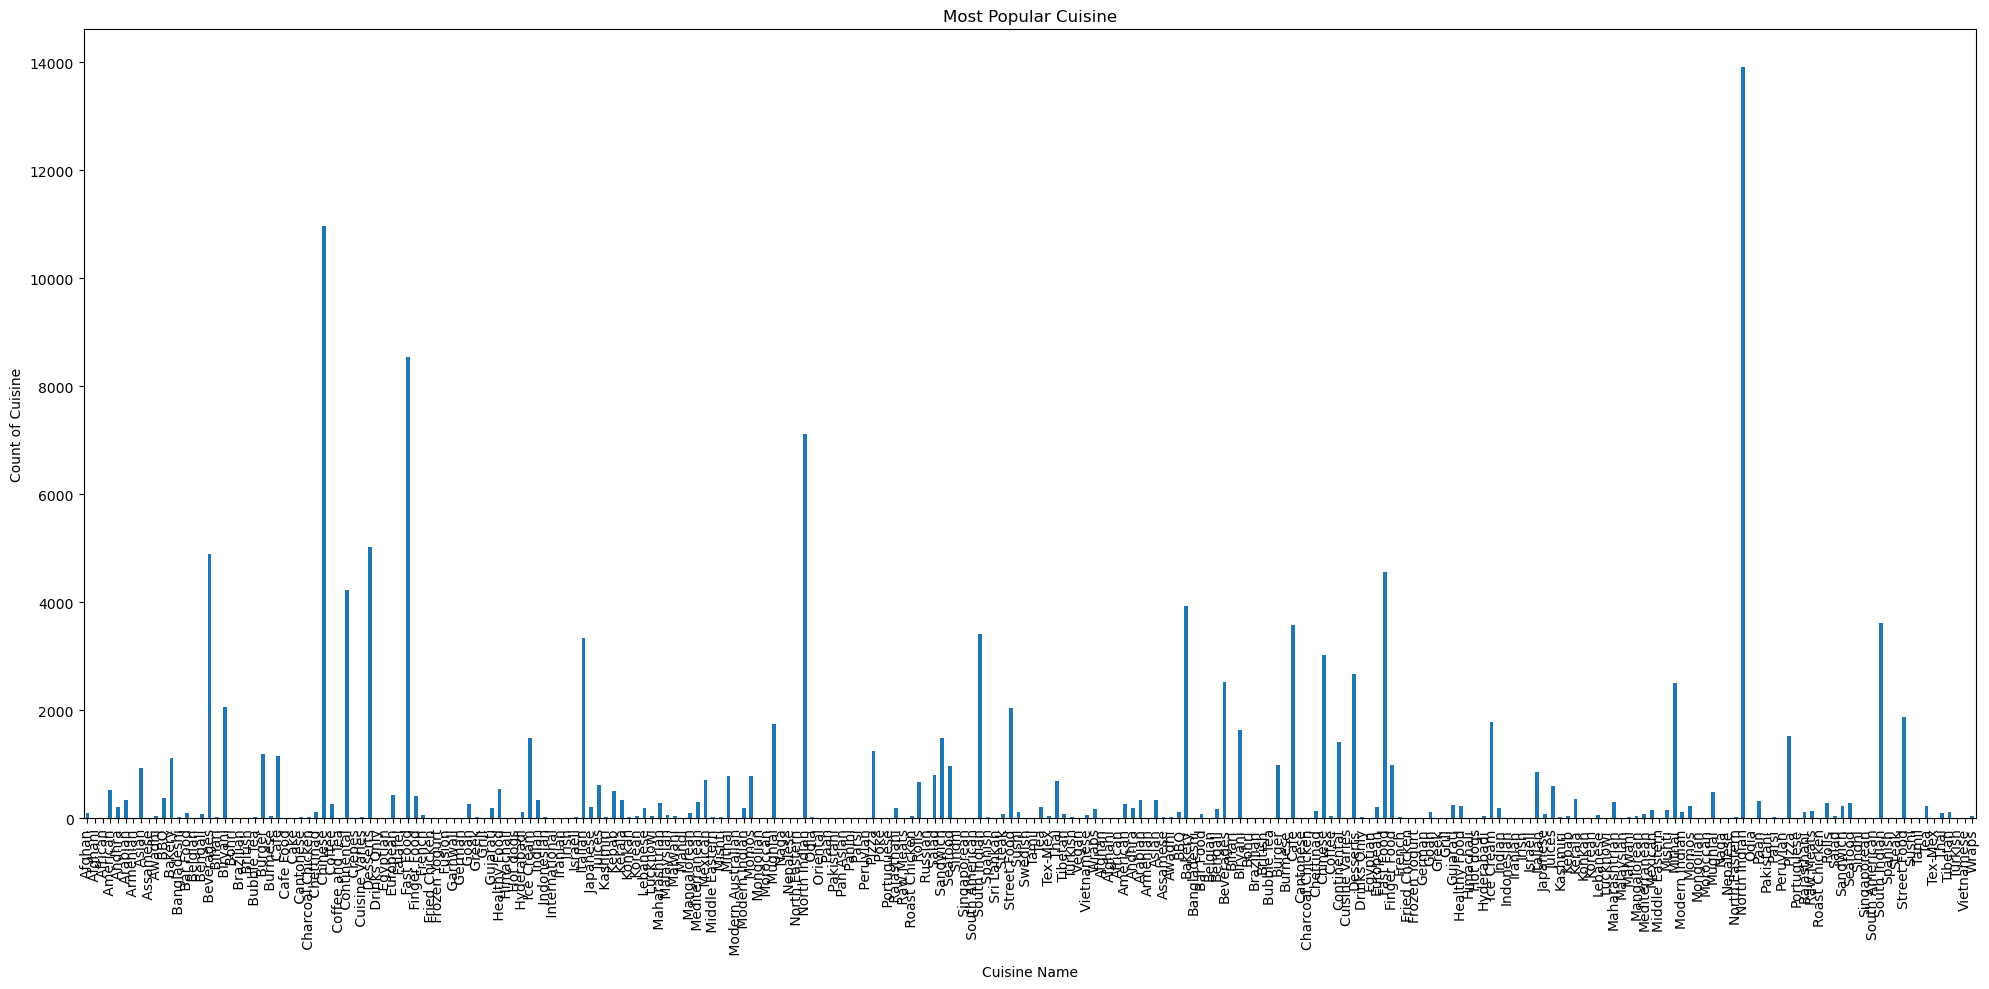

In [88]:
plt.figure(figsize=(20, 10))
popular_cuisines.plot(kind= 'bar')
plt.title('Most Popular Cuisine')
plt.ylabel('Count of Cuisine')
plt.xlabel('Cuisine Name')
plt.xticks(rotation=90, fontsize =10) 
plt.tight_layout()
plt.show()

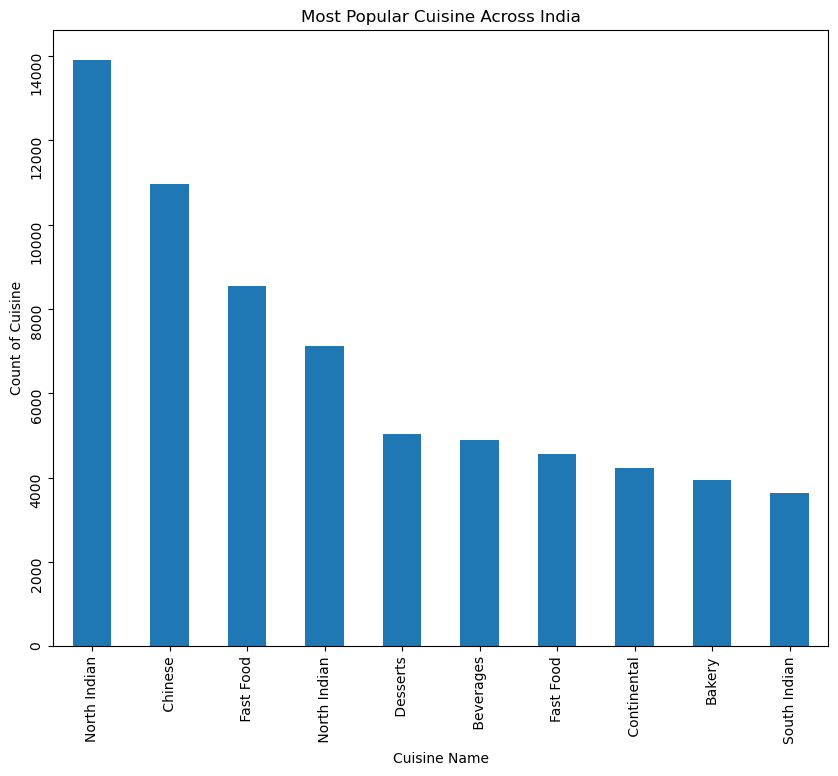

In [89]:
top_10_popular_cuisine =popular_cuisines.nlargest(10)
plt.figure(figsize=(10, 8))
top_10_popular_cuisine.plot(kind= 'bar')
plt.title('Most Popular Cuisine Across India')
plt.ylabel('Count of Cuisine')
plt.xlabel('Cuisine Name')
plt.xticks(rotation=90, fontsize= 10)  
plt.yticks(rotation=90, fontsize= 10)  
plt.show()

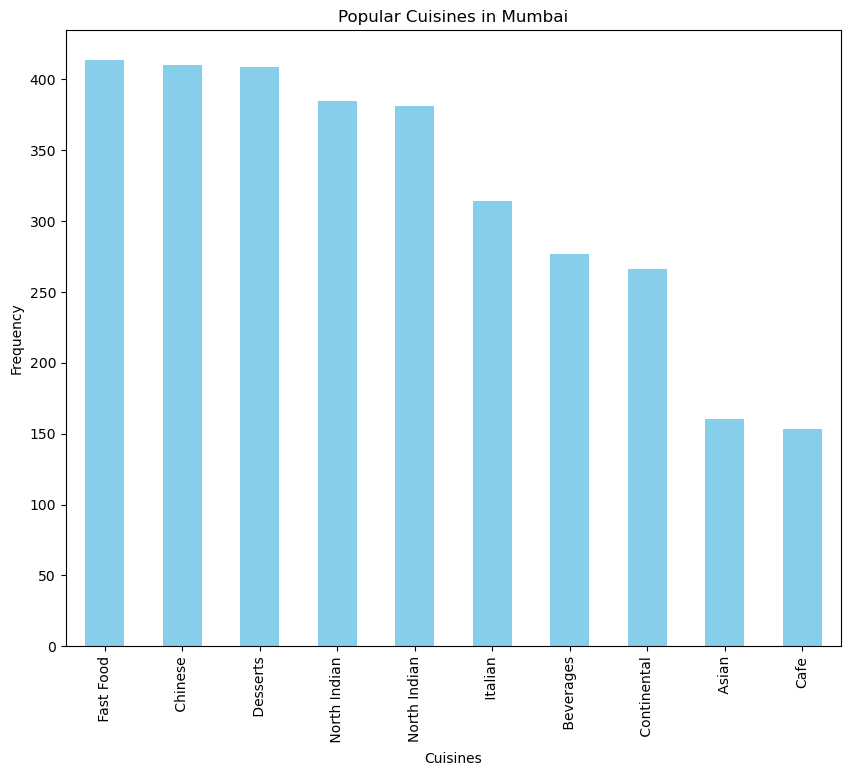

In [90]:
mumbai_cuisines = df_cleaned[df_cleaned['city'] == 'Mumbai']
cuisine_counts = mumbai_cuisines['cuisines_list'].value_counts()
Top=cuisine_counts.nlargest(10)
plt.figure(figsize=(10, 8))
Top.plot(kind='bar', color='skyblue')
plt.xlabel('Cuisines')
plt.ylabel('Frequency')
plt.title('Popular Cuisines in Mumbai')
plt.show()

Ratings and Reviews:

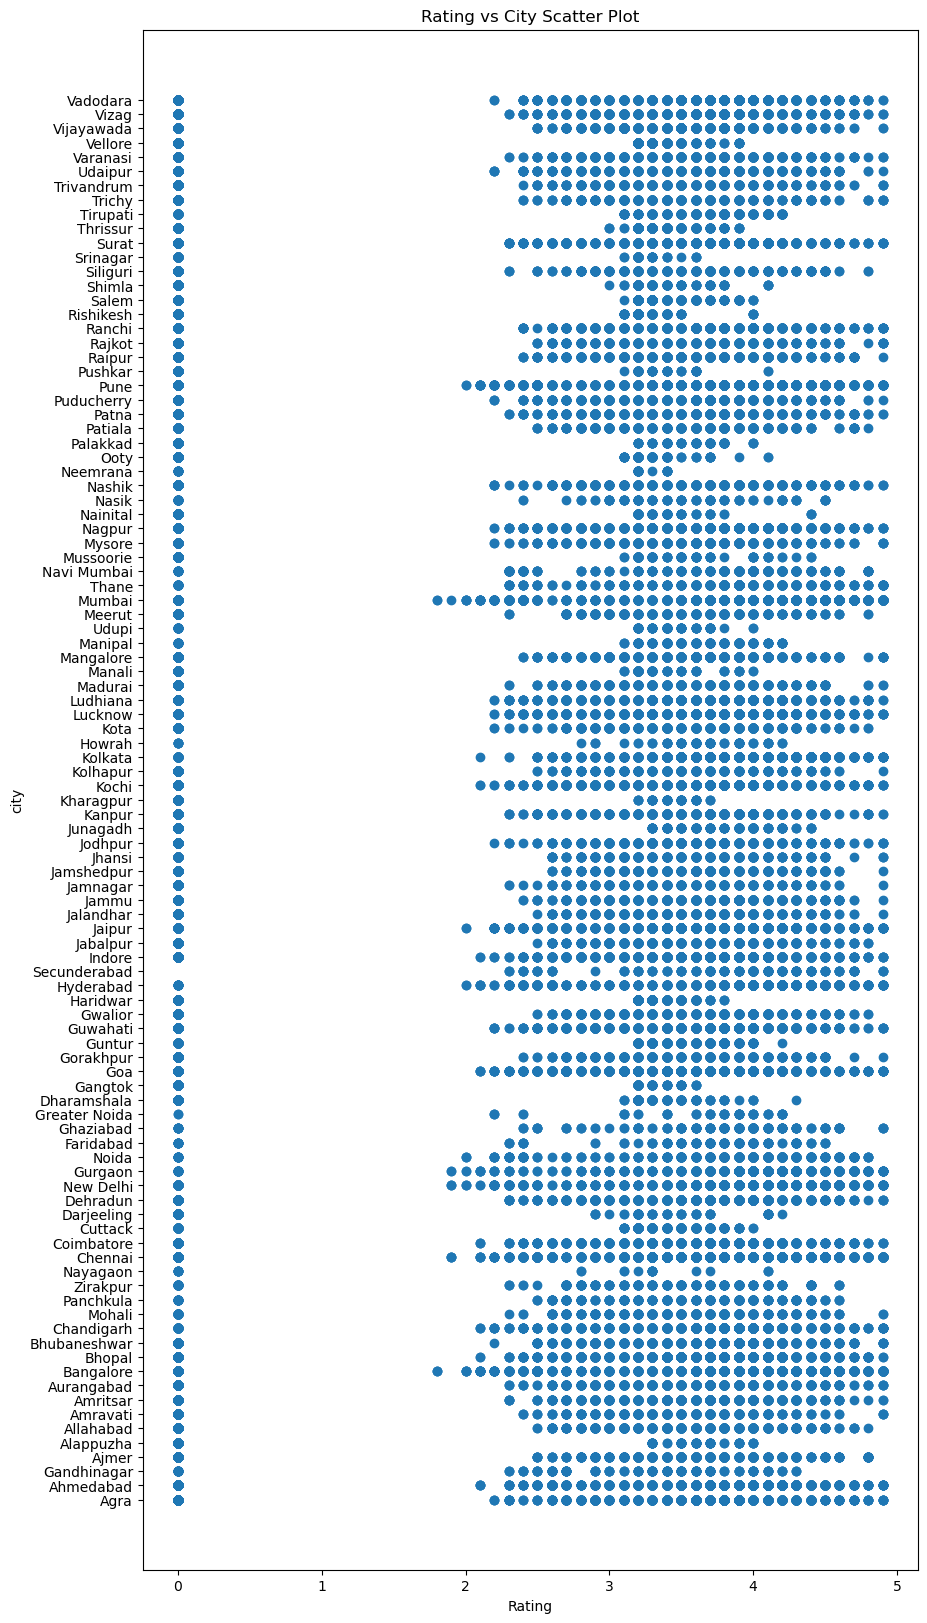

In [91]:
plt.figure(figsize=(10, 20))
plt.scatter(df['aggregate_rating'],df['city'])
plt.xlabel('Rating')
plt.ylabel('city')
plt.title('Rating vs City Scatter Plot')
plt.yticks(rotation=0, fontsize =10) 
plt.show()


Number of Restaurants

In [92]:
number_of_resturants =df_cleaned.groupby('city')['name'].nunique()
number_of_resturants

city
Agra          758
Ahmedabad     966
Ajmer         382
Alappuzha     239
Allahabad     518
             ... 
Varanasi      546
Vellore       270
Vijayawada    413
Vizag         601
Zirakpur      140
Name: name, Length: 99, dtype: int64

In [93]:
total_unique_restaurants = number_of_resturants.sum()
total_unique_restaurants

46928

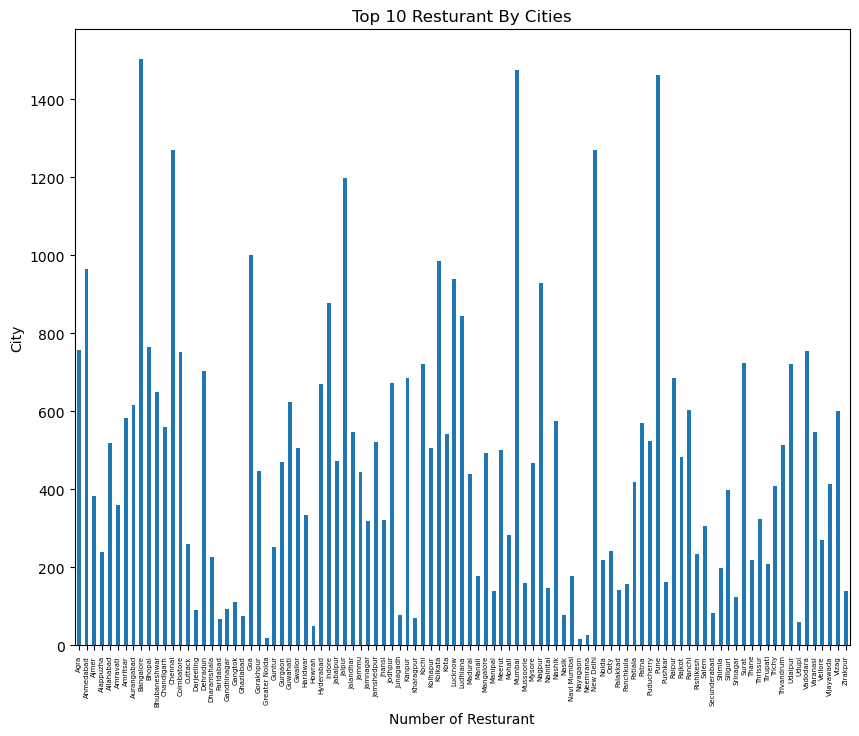

In [94]:
plt.figure(figsize=(10,8))

number_of_resturants.plot(kind='bar')
plt.xlabel('Number of Resturant')
plt.ylabel('City')
plt.title("Top 10 Resturant By Cities")
plt.xticks(rotation=90, fontsize =5) 
plt.show()

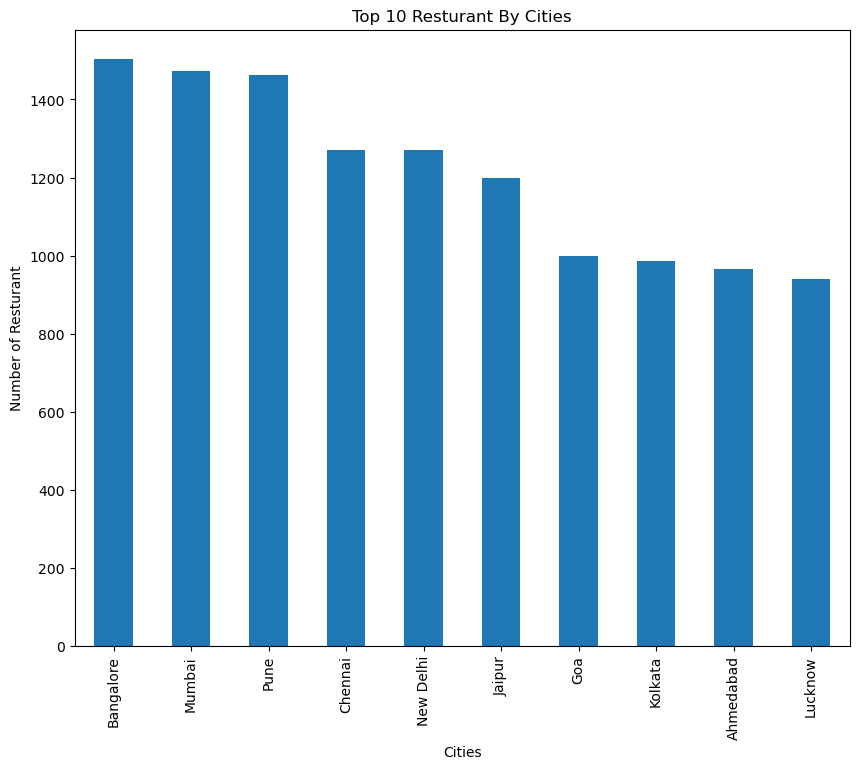

In [95]:
plt.figure(figsize=(10,8))
Top_10_Resturant_By_Cities= number_of_resturants.nlargest(10)
Top_10_Resturant_By_Cities.plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of Resturant')
plt.title("Top 10 Resturant By Cities")
plt.show()

In [96]:
Votes_per_City_count =df_cleaned.groupby('city')['votes'].count()
Votes_per_City_count

city
Agra          1789
Ahmedabad     2544
Ajmer         1104
Alappuzha      443
Allahabad     1077
              ... 
Varanasi      1277
Vellore        733
Vijayawada    1505
Vizag         1651
Zirakpur       358
Name: votes, Length: 99, dtype: int64

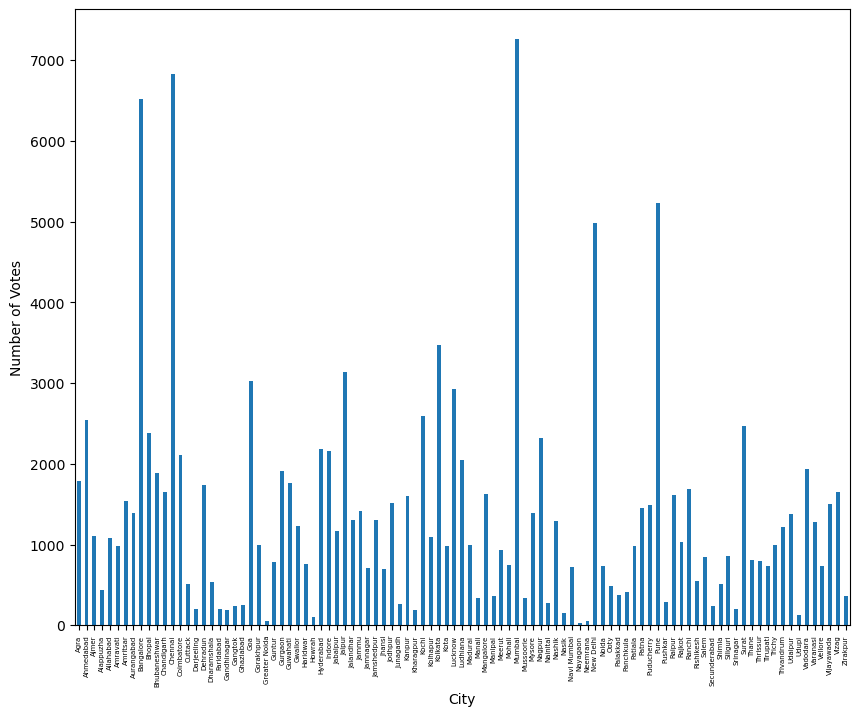

In [97]:
plt.figure(figsize=(10,8))

Votes_per_City_count.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90, fontsize =5) 
plt.show()



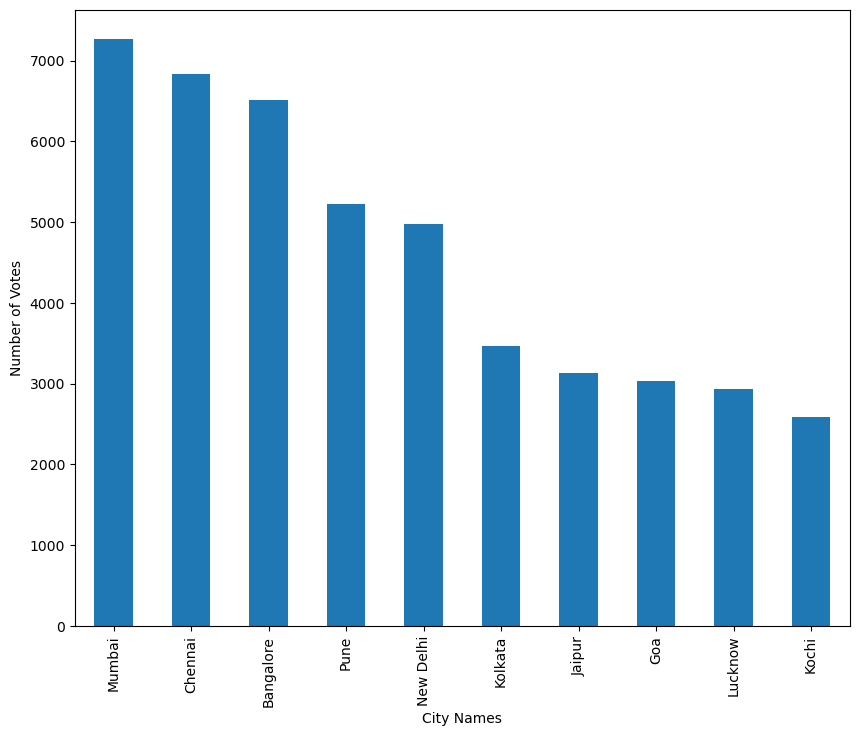

In [98]:
plt.figure(figsize=(10,8))
Votes_per_City =Votes_per_City_count.nlargest(10)
Votes_per_City.plot(kind='bar')
plt.xlabel('City Names')
plt.ylabel('Number of Votes')
plt.show()
#it shows engagement


# Customer Preference Analysis

In [99]:
#Analyze the types of cuisines that are popular in different regions. Mumbai. 

In [100]:
popular_cuisines1 = df_cleaned.groupby('cuisines_list')['city'].size().sort_values(ascending=False)
popular_cuisines1

cuisines_list
North Indian      13918
 Chinese          10971
 Fast Food         8551
 North Indian      7120
 Desserts          5027
                  ...  
 Peruvian             1
Mongolian             1
Bohri                 1
Pakistani             1
 International        1
Name: city, Length: 248, dtype: int64

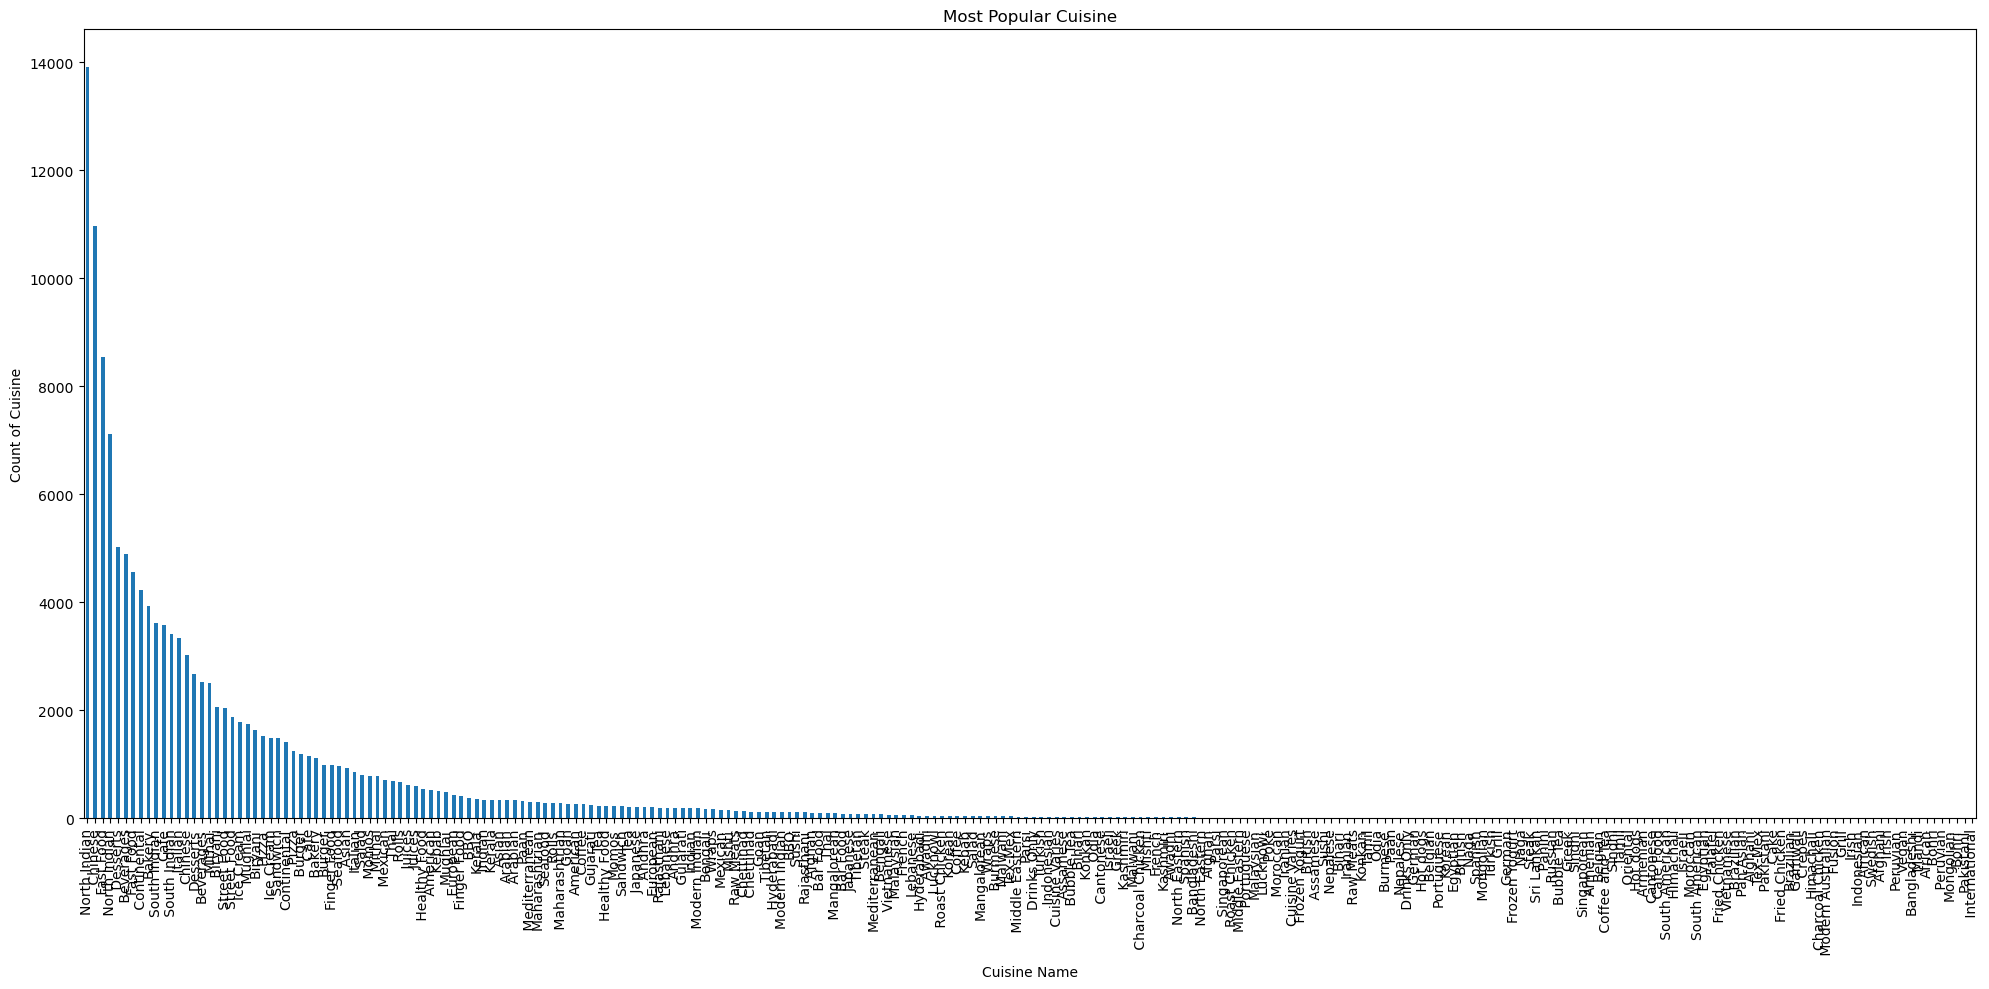

In [101]:

plt.figure(figsize=(20, 10))
popular_cuisines1.plot(kind='bar')
plt.title('Most Popular Cuisine')
plt.ylabel('Count of Cuisine')
plt.xlabel('Cuisine Name')
plt.xticks(rotation=90, fontsize =10) 
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 10 Popular Cuisines Accorss Cities')

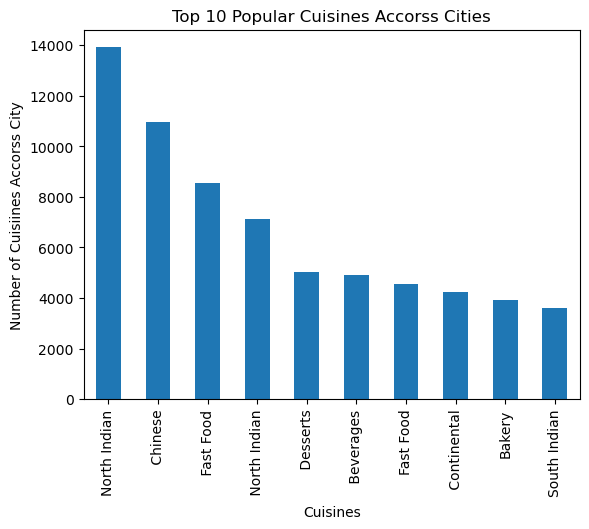

In [102]:
Top_10_Popular_Cuisines = popular_cuisines1.nlargest(10)
Top_10_Popular_Cuisines.plot(kind = 'bar')
plt.xlabel('Cuisines')
plt.ylabel('Number of Cuisiines Accorss City')
plt.title('Top 10 Popular Cuisines Accorss Cities')



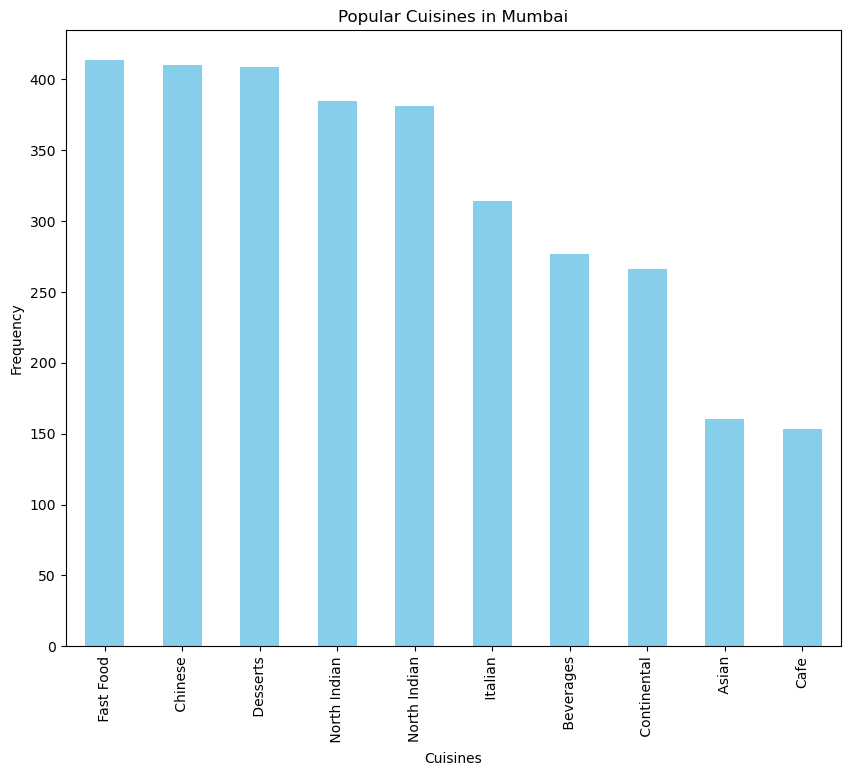

In [103]:
mumbai_cuisines = df_cleaned[df_cleaned['city'] == 'Mumbai']
cuisine_counts = mumbai_cuisines['cuisines_list'].value_counts()
Top=cuisine_counts.nlargest(10)
plt.figure(figsize=(10, 8))
Top.plot(kind='bar', color='skyblue')
plt.xlabel('Cuisines')
plt.ylabel('Frequency')
plt.title('Popular Cuisines in Mumbai')
plt.show()

In [104]:
#Examine the relationship between restaurant ratings, price range, and popularity.,popular_cuisines

In [105]:
corr = df[['price_range', 'aggregate_rating', 'votes']].corr()
corr

,price_range,aggregate_rating,votes
price_range,1.000000,0.263490,0.254635
aggregate_rating,0.263490,1.000000,0.278544
votes,0.254635,0.278544,1.000000


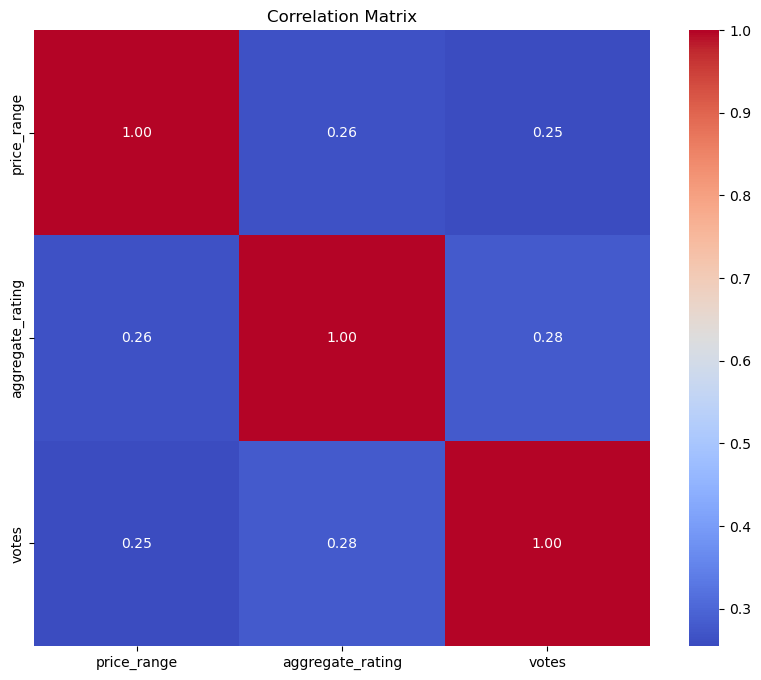

In [106]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#The above correlation matrxi shows the relationship between three variables i,e. price, aggregate rating and vote. 
#from the analysis it can be seen that there is a correlation between variables which means a liner relationship but it is week correlation.
#All variables tend to go up in response to one another, the relationship is not very strong. 

# Competitive Analysis

In [107]:
#Identify major competitors in each region based on cuisine, pricing, and ratings.
#Major competitors in each region based on cuisine

In [108]:
major_competitor=df_cleaned.groupby('name')['cuisines_list'].value_counts()
major_competitor

name                                 cuisines_list
# Wednesday                           Chinese         1
                                     Fast Food        1
                                      North Indian    1
#1, Culinary Avenue - The Red Maple  North Indian     1
                                      Continental     1
                                                     ..
ह-tea The Tea Hut                     Italian         1
                                      Fast Food       1
                                      Chinese         1
                                      Beverages       1
                                     Cafe             1
Name: count, Length: 97220, dtype: int64

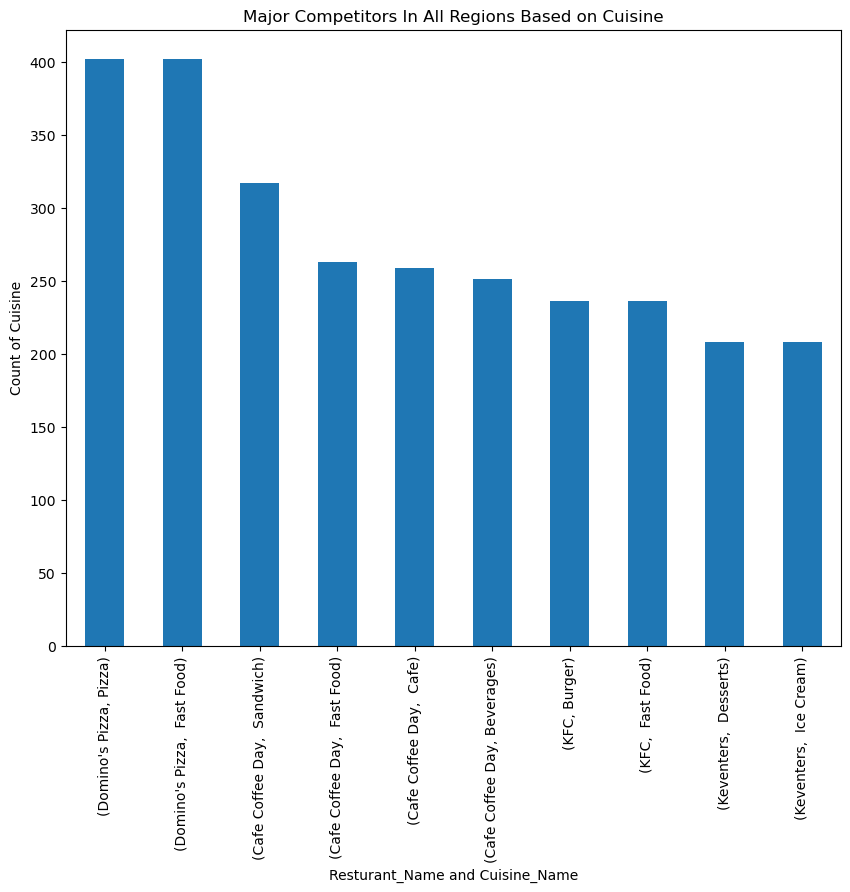

In [110]:
plt.figure(figsize=(10,8))
competitors=major_competitor.nlargest(10)
competitors.plot(kind='bar')
plt.xlabel('Resturant_Name and Cuisine_Name')
plt.ylabel('Count of Cuisine')
plt.title('Major Competitors In All Regions Based on Cuisine')
plt.show()

In [111]:
mumbai_information= df_cleaned[df_cleaned['city'] == 'Mumbai']
mumbai_information

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,days,cuisines_list
134852,18562340,Drinkery 51,Casual Dining,https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1,Not Defined,North Indian
134852,18562340,Drinkery 51,Casual Dining,https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1,Not Defined,Asian
134852,18562340,Drinkery 51,Casual Dining,https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1,Not Defined,Continental
134852,18562340,Drinkery 51,Casual Dining,https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1,Not Defined,Seafood
134853,34757,Joey's Pizza,Quick Bites,https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1,Mon-Sun,Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142349,37750,Faasos,Quick Bites,https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1,Not Defined,Biryani
142349,37750,Faasos,Quick Bites,https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1,Not Defined,Rolls
142349,37750,Faasos,Quick Bites,https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1,Not Defined,Wraps
142352,18140577,Rasoi Thali,Quick Bites,https://www.zomato.com/mumbai/rasoi-thali-mulu...,"Shop 5, Bhodke Building, Near Hanuman Mandir, ...",Mumbai,3,Mulund West,19.172657,72.956466,...,"['Lunch', 'Cash', 'Debit Card', 'Dinner', 'Tak...",3.9,Good,142,34,0.0,-1,-1,Mon-Sun,Street Food


In [112]:
mumbai_information= df_cleaned[df_cleaned['city'] == 'Mumbai']
mumbai_information
cusine_counts1 = mumbai_information.groupby('name')['cuisines_list'].value_counts()
cusine_counts1

name                        cuisines_list
1 BHK - Brew House Kitchen   Italian         2
                             European        2
                             Parsi           2
                            North Indian     2
10th Street Cafe            European         1
                                            ..
Zouk                        North Indian     1
Zytun - The Restaurant       Chinese         1
                             Thai            1
                            North Indian     1
edwins                      Beverages        1
Name: count, Length: 4217, dtype: int64

In [113]:
Top1=cusine_counts1.nlargest(10)
print(Top1)

name        cuisines_list
Keventers    Ice Cream       28
            Beverages        28
             Desserts        28
Ek Cutting  Tea              27
Subway      Fast Food        24
             Healthy Food    24
             Salad           24
             Sandwich        24
Theobroma    Fast Food       22
             Desserts        22
Name: count, dtype: int64


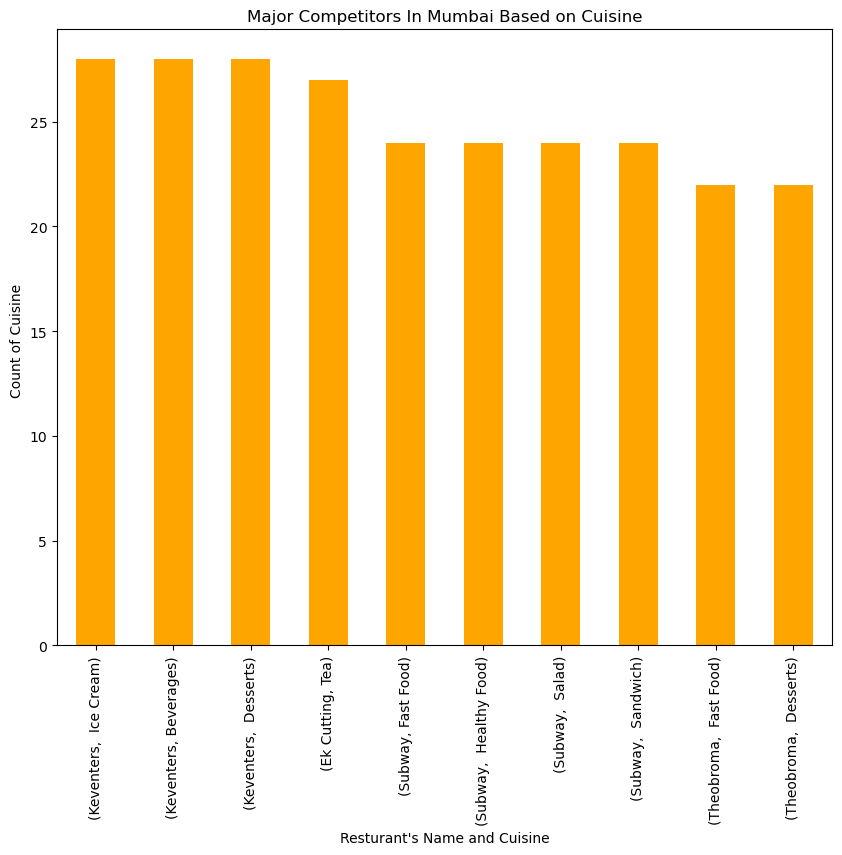

In [114]:

plt.figure(figsize=(10, 8))
Top1.plot(kind='bar', color='orange')
plt.xlabel("Resturant's Name and Cuisine")
plt.ylabel('Count of Cuisine ')
plt.title('Major Competitors In Mumbai Based on Cuisine')
plt.show()

In [115]:
major_competitor1=df_cleaned.groupby('name')['cuisines_list'].count()
major_competitor1

name
# Wednesday                            3
#1, Culinary Avenue - The Red Maple    3
#788 Avenue                            3
#BC                                    3
#BEiR                                  4
                                      ..
 Food Street - Veg                     1
ट 4 Tasty                              1
द Vege टेबल                            3
स्पेस Bar                              3
ह-tea The Tea Hut                      6
Name: cuisines_list, Length: 40757, dtype: int64

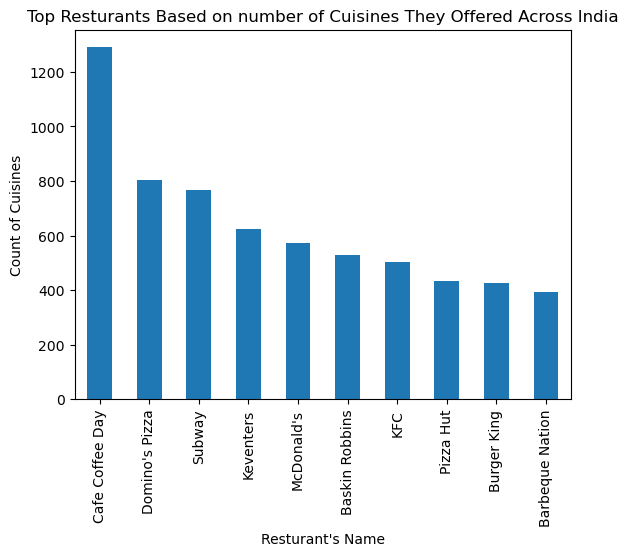

In [116]:
competitors1 = major_competitor1.nlargest(10)
competitors1.plot(kind= 'bar')
plt.xlabel("Resturant's Name")
plt.ylabel('Count of Cuisines')
plt.title('Top Resturants Based on number of Cuisines They Offered Across India')
plt.show()

In [118]:
#Identify major competitors in each region based on pricing

In [117]:
major_competitor2=df_cleaned.groupby('name')['price_range'].value_counts()
major_competitor2

name                                 price_range
# Wednesday                          1              3
#1, Culinary Avenue - The Red Maple  4              3
#788 Avenue                          3              3
#BC                                  4              3
#BEiR                                3              4
                                                   ..
 Food Street - Veg                   1              1
ट 4 Tasty                            2              1
द Vege टेबल                          3              3
स्पेस Bar                            3              3
ह-tea The Tea Hut                    2              6
Name: count, Length: 42681, dtype: int64

In [119]:
major_competitor3= major_competitor2.nlargest(40)

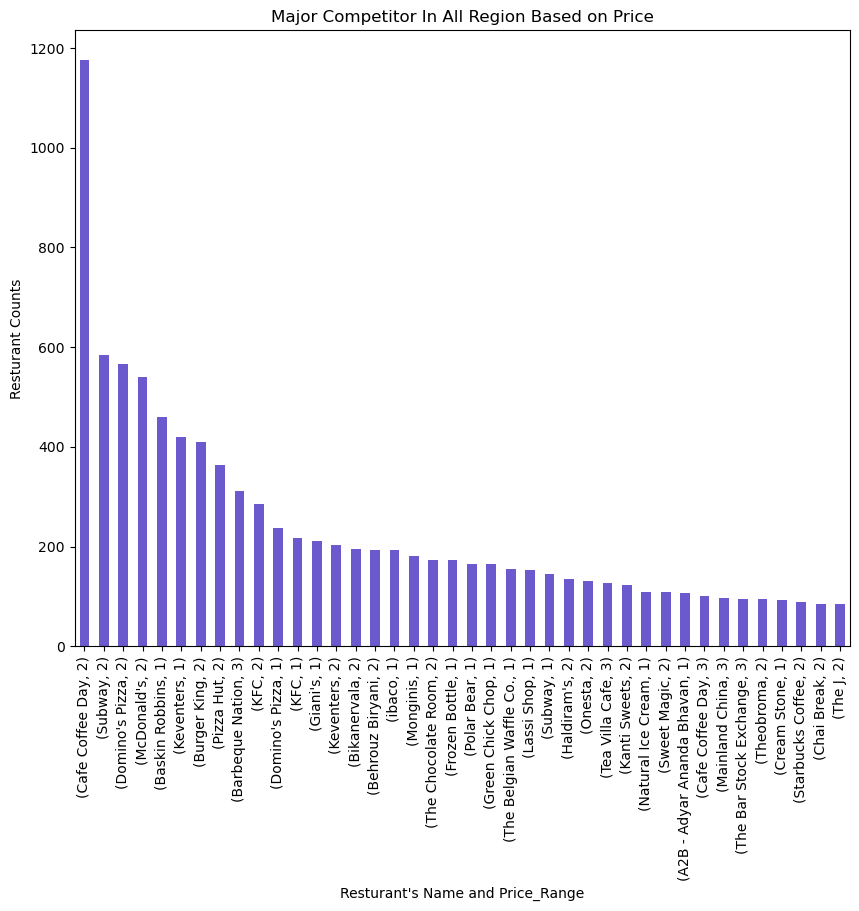

In [120]:
plt.figure(figsize=(10,8))
major_competitor3.plot(kind='bar', color='slateblue')
plt.xlabel("Resturant's Name and Price_Range")
plt.ylabel("Resturant Counts")
plt.title('Major Competitor In All Region Based on Price')
plt.show()

In [121]:
mumbai_information2= df_cleaned[df_cleaned['city'] == 'Mumbai']


In [122]:
major_competitor4=mumbai_information2.groupby('name')['price_range'].value_counts()
major_competitor4


name                           price_range
1 BHK - Brew House Kitchen     3               8
10th Street Cafe               3               4
1441 Pizzeria                  2               6
145 Bandra                     3              10
145 Kala Ghoda                 3              10
                                              ..
Ziya - The Oberoi Mumbai       4               2
Zoodles - Oriental Street Wok  2              13
Zouk                           3               3
Zytun - The Restaurant         3               3
edwins                         1               1
Name: count, Length: 1487, dtype: int64

In [123]:
largest=major_competitor4.nlargest(10)
print(largest)

name                    price_range
Subway                  1              96
Keventers               1              84
McDonald's              2              77
Tea Villa Cafe          3              68
Theobroma               2              66
The Bar Stock Exchange  3              60
Frozen Bottle           1              56
Cafe Coffee Day         2              52
The J                   2              51
Bayroute                4              50
Name: count, dtype: int64


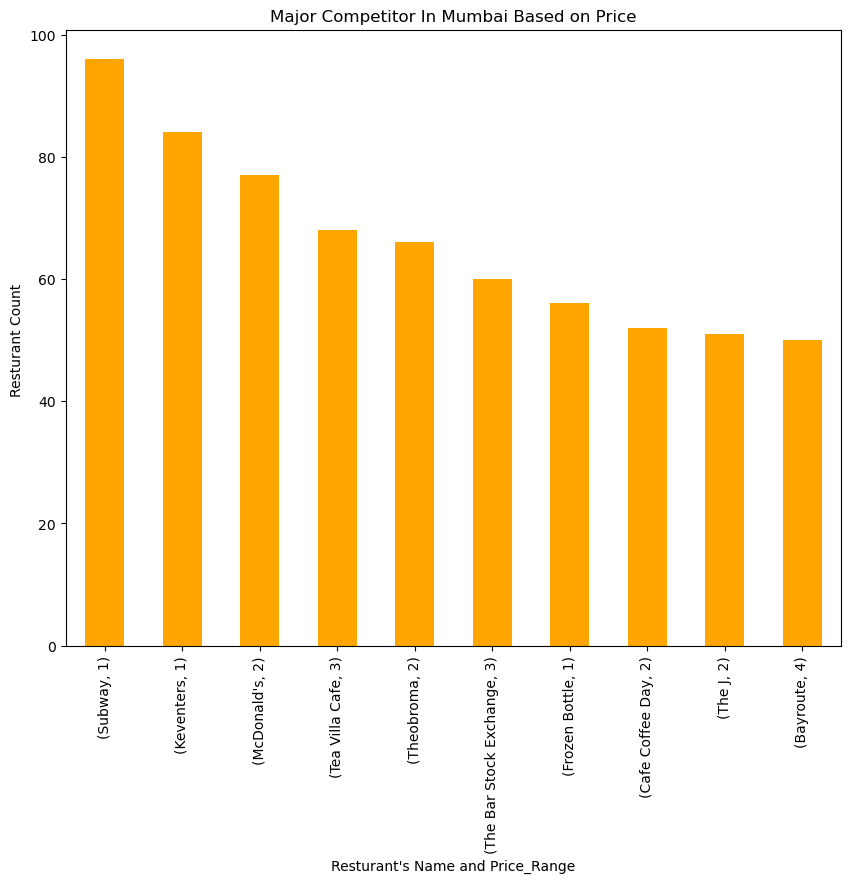

In [124]:

plt.figure(figsize=(10, 8))
largest.plot(kind='bar', color='orange')
plt.xlabel("Resturant's Name and Price_Range")
plt.ylabel('Resturant Count ')
plt.title('Major Competitor In Mumbai Based on Price')
plt.show()

#Identify major competitors in each region based on rating

In [127]:
major_competitor_rating= df_cleaned.groupby('name')['aggregate_rating'].value_counts()

In [128]:
major_competitor_rating

name                                 aggregate_rating
# Wednesday                          3.5                 3
#1, Culinary Avenue - The Red Maple  3.9                 3
#788 Avenue                          3.9                 3
#BC                                  4.2                 3
#BEiR                                4.1                 4
                                                        ..
 Food Street - Veg                   2.9                 1
ट 4 Tasty                            3.7                 1
द Vege टेबल                          4.2                 3
स्पेस Bar                            4.3                 3
ह-tea The Tea Hut                    4.2                 6
Name: count, Length: 49051, dtype: int64

In [129]:
major_competitor_rating1= major_competitor_rating.nlargest(10)

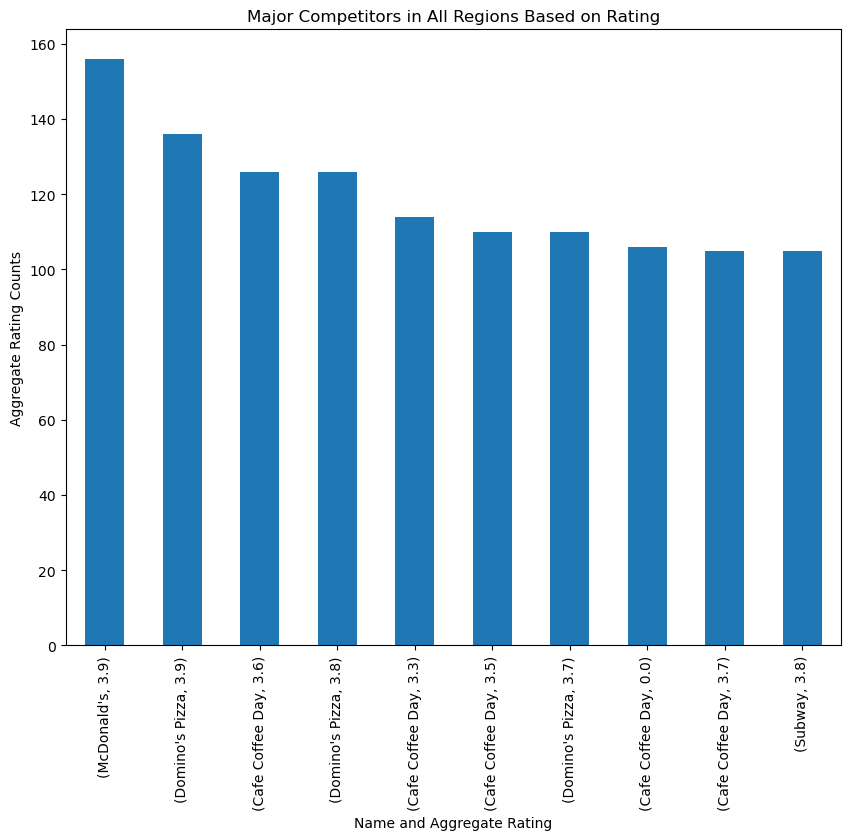

In [130]:
plt.figure(figsize=(10,8))
major_competitor_rating1.plot(kind='bar')
plt.title('Major Competitors in All Regions Based on Rating')
plt.xlabel('Name and Aggregate Rating')
plt.ylabel('Aggregate Rating Counts')
plt.show()

In [131]:
mumbai_information4= df_cleaned[df_cleaned['city'] == 'Mumbai']


In [132]:
major_competitor_rating4= mumbai_information4.groupby('name')['aggregate_rating'].value_counts()

In [133]:
major_competitor_rating5= major_competitor_rating4.nlargest(10)

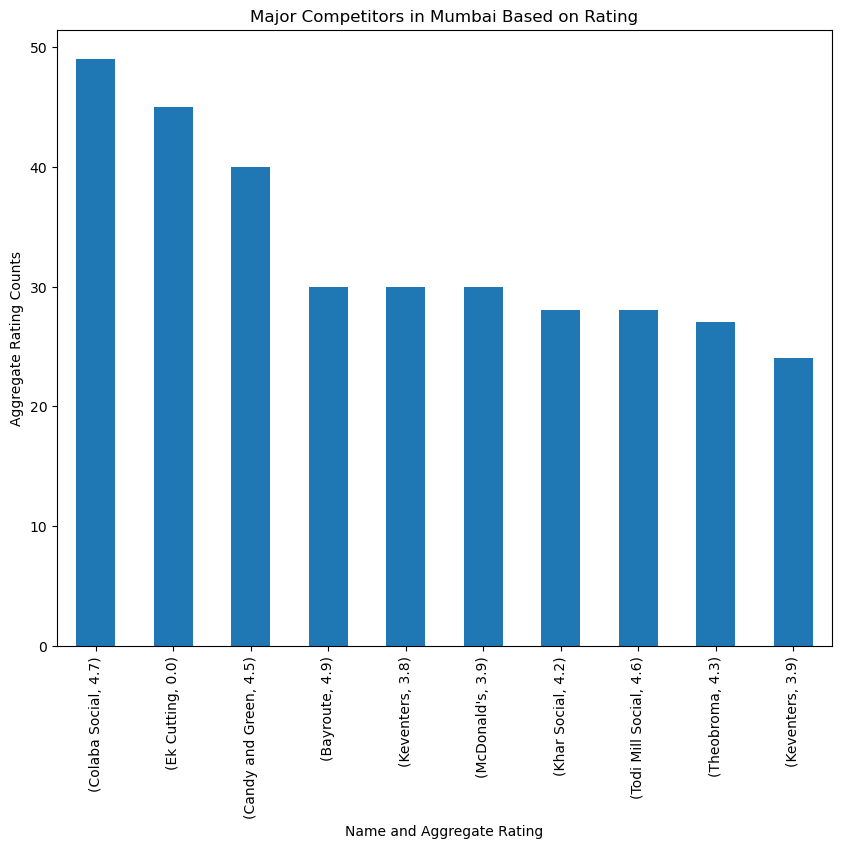

In [134]:
plt.figure(figsize=(10,8))
major_competitor_rating5.plot(kind='bar')
plt.title('Major Competitors in Mumbai Based on Rating')
plt.xlabel('Name and Aggregate Rating')
plt.ylabel('Aggregate Rating Counts')
plt.show()

# Market Gap Analysis

In [ ]:
#Identify any gaps in the market that the restaurant chain can capitalize on (e.g., underrepresented cuisines, price ranges).

In [135]:
market_gap1 = df_cleaned.groupby('cuisines_list')['cuisines_list'].value_counts().sort_values()

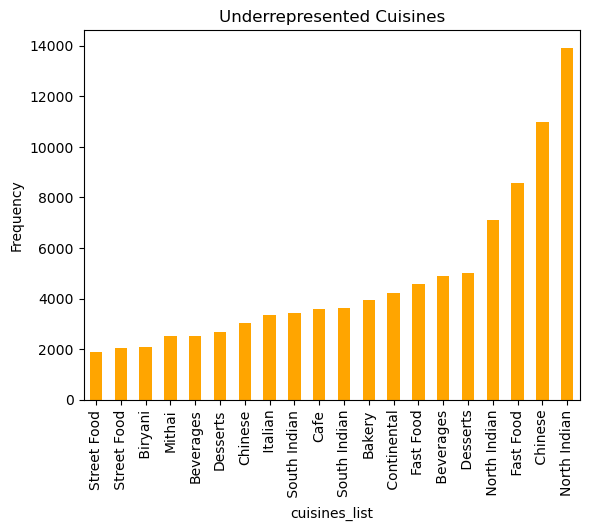

In [136]:
market_gap1.tail(20).plot(kind= 'bar', color ='orange')
plt.ylabel('Frequency')
plt.title('Underrepresented Cuisines')
plt.show()

#just for better representation.

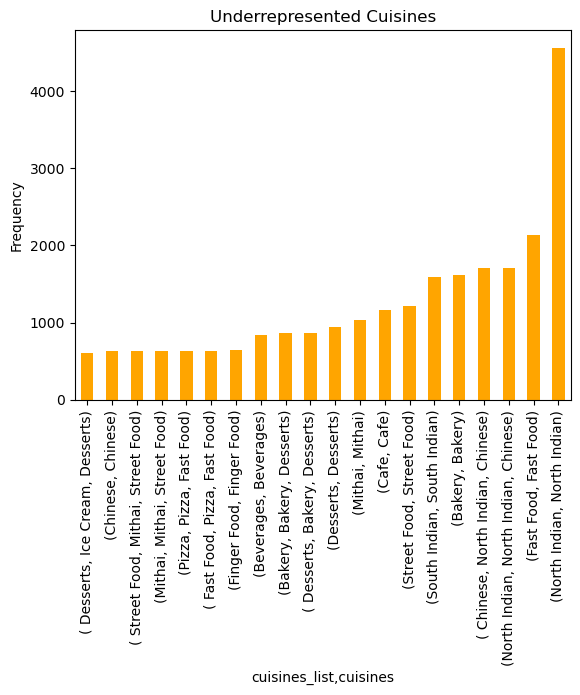

In [137]:
market_gap2 = df_cleaned.groupby('cuisines_list')['cuisines'].value_counts().sort_values()

market_gap2.tail(20).plot(kind= 'bar', color ='orange')
plt.ylabel('Frequency')
plt.title('Underrepresented Cuisines')
plt.show()

#just for better representation.

In [138]:
cousine_counts5 = df_cleaned.groupby('cuisines_list')['price_range'].value_counts().sort_values()

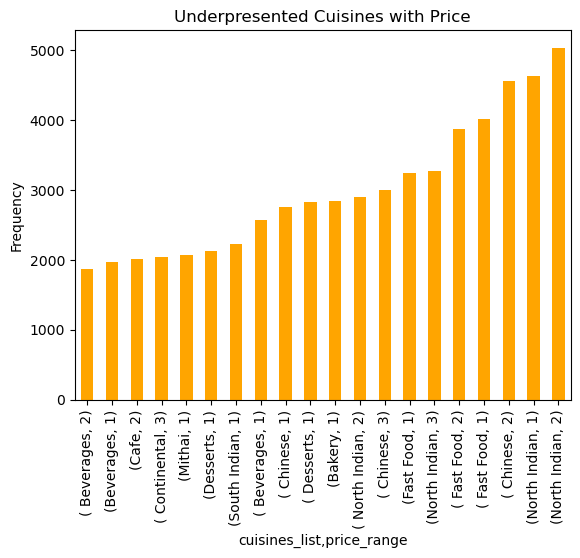

In [139]:
cousine_counts5.tail(20).plot(kind= 'bar', color ='orange')
plt.ylabel('Frequency')
plt.title('Underpresented Cuisines with Price')
plt.show()



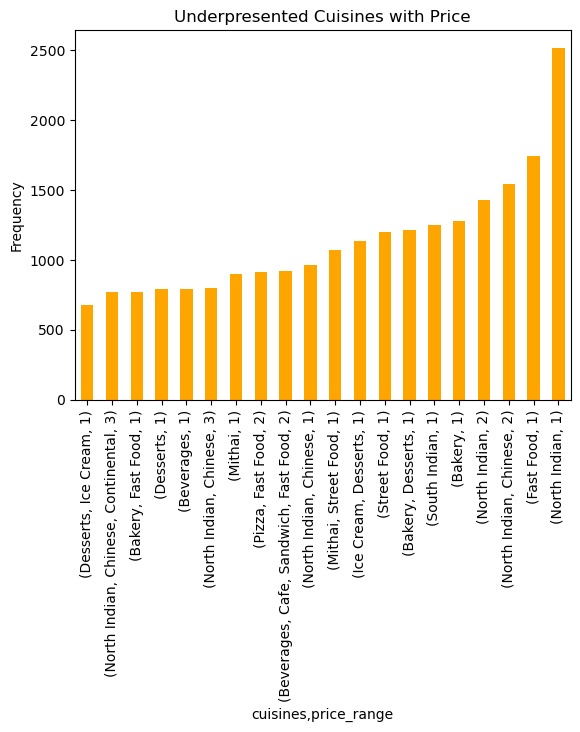

In [140]:
cousine_counts6 = df_cleaned.groupby('cuisines')['price_range'].value_counts().sort_values()
cousine_counts6.tail(20).plot(kind= 'bar', color ='orange')
plt.ylabel('Frequency')
plt.title('Underpresented Cuisines with Price')
plt.show()
